Text(0, 0.5, 'Cycle life')

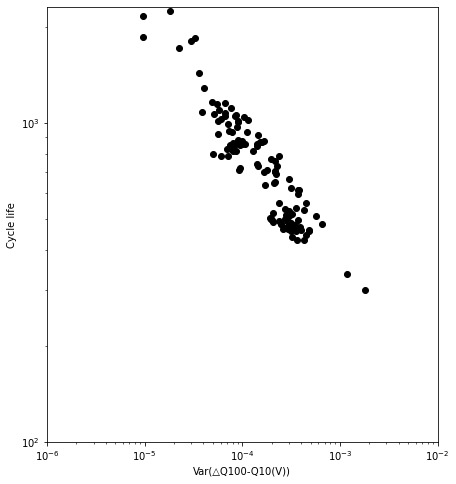

In [17]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

X=[]
Y=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    X.append(var)
    Y.append(cycle[0][0])
    
plt.figure(figsize=(7,8))
plt.scatter(X,Y,color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')

In [49]:
cycle_test=bat_dict['b1c0']['cycle_life'].tolist()
cycle_test[0][0]

1852.0

In [18]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [19]:
np.random.seed(42)
threshold = 550

In [20]:
imax=150
jmax=60

def i_j_make():
    i_=[]
    j_=[]
    for i in range(2,imax+1): # 
        for j in range(1,jmax+1): # j
            if i<=j:
                continue
            i_.append(i)
            j_.append(j)
    return i_,j_

In [21]:
i_, j_ =i_j_make()

[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24,

In [86]:
test_data=[]
train_data=[]

test_label=[]
train_label=[]

sec_data=[]
sec_label=[]
for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    if i in test_ind :
        test_data.append(j)
        cycle_test=bat_dict[j]['cycle_life'].tolist()
        test_label.append(cycle_test[0][0])
        
    if i in train_ind :
        train_data.append(j)
        cycle_train=bat_dict[j]['cycle_life'].tolist()
        train_label.append(cycle_train[0][0])
            
            
    if i in secondary_test_ind:
        sec_data.append(j)
        cycle_sec=bat_dict[j]['cycle_life'].tolist()
        sec_label.append(cycle_sec[0][0])

In [87]:
test_data=np.array(test_data)
train_data=np.array(train_data)
test_label=np.array(test_label)
train_label=np.array(train_label)
sec_label=np.array(sec_label)
sec_data=np.array(sec_data)

In [88]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape, sec_data.shape, sec_label.shape

((41,), (41,), (42,), (42,), (36,), (36,))

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
def Logistic_RMSE(X,Y,boot_trainX,boot_trainY,boot_testX,boot_testY): #학습은 train data 로 진행 하고 predict는 랜덤 데이터 얻기
    Log_reg = LinearRegression()
    x=X.reshape(-1,1)
    Log_reg.fit(x,Y)
    train_X=boot_trainX.reshape(-1,1)
    test_X=boot_testX.reshape(-1,1)
    
    pred_train=Log_reg.predict(train_X.reshape(-1,1))
    pred_test=Log_reg.predict(test_X.reshape(-1,1))

    RMSE_train=mean_squared_error(boot_trainY,pred_train, squared=False)
    RMSE_test=mean_squared_error(boot_testY,pred_test, squared=False)

    
    return RMSE_train, RMSE_test



In [90]:
#train(i*j) AUC 구하기
mx_train=np.zeros((jmax+1,imax+1))
mx_test=np.zeros((jmax+1,imax+1))
for i,j in zip(i_,j_):
    var_=np.array([])
    var_test_=np.array([])
    var_sec_=np.array([])
    for k in train_data:
        diff=bat_dict[k]['cycles']['{}'.format(i)]['Qdlin']- bat_dict[k]['cycles']['{}'.format(j)]['Qdlin']
        var_=np.hstack([var_,np.var(diff)])
    for k in test_data:
        diff=bat_dict[k]['cycles']['{}'.format(i)]['Qdlin']- bat_dict[k]['cycles']['{}'.format(j)]['Qdlin']
        var_test_=np.hstack([var_test_,np.var(diff)])
    for k in sec_data:
        diff=bat_dict[k]['cycles']['{}'.format(i)]['Qdlin']- bat_dict[k]['cycles']['{}'.format(j)]['Qdlin']
        var_sec_=np.hstack([var_sec_,np.var(diff)])
    print(var_.shape,var_test_.shape,var_sec_.shape)
    

    
    #데이터 정규화(표준화, Z-scoring ,) , mean, std 구하기 뒤에 rmse 에 사용할 것.
    scaler = StandardScaler() 
    #train
    var_mean=np.mean(np.log(var_))
    var_std=np.std(np.log(var_))
    print('mean',var_mean,'std',var_std)
    var = scaler.fit_transform(np.log(var_).reshape(-1,1))
    var_test = scaler.transform(np.log(var_test_).reshape(-1,1))
    var_sec = scaler.transform(np.log(var_sec_).reshape(-1,1))   



    boot_select_train=len(var)
    boot_select_test=len(var_test)
    
    boot_sample=20
    
    train_range= range(0,boot_select_train) # 0~40 숫자중 41번 랜덤 선택하도록 한 후 배열에 이 숫자를 적용.
    test_range= range(0,boot_select_test)
    
    rmse_train=[]
    rmse_test=[]
    
    for _ in range(boot_sample):
        np.random.seed(42)
        sample_n=np.random.choice(train_range ,size=boot_select_train)
        sample_test=np.random.choice(test_range ,size=boot_select_test)
        random_trainX=np.array([])
        random_trainY=np.array([])
        random_testX=np.array([])
        random_testY=np.array([])
        for n in sample_n:
            random_trainX=np.hstack([random_trainX,np.array(var[n])])
            random_trainY=np.hstack([random_trainY,np.array([train_label[n]])])
        for n in sample_test:
            random_testX=np.hstack([random_testX,np.array(var_test[n])])
            random_testY=np.hstack([random_testY,np.array([test_label[n]])])
        RMSE_train, RMSE_test =Logistic_RMSE(var,train_label,random_trainX,random_trainY,random_testX,random_testY)
        rmse_train.append(RMSE_train)
        rmse_test.append(RMSE_test)
        
    rmse_train_cycle=np.mean(rmse_train)
    rmse_test_cycle=np.mean(rmse_test)

    print('i={},j={}   RMSE_train= '.format(i,j),rmse_train_cycle)
    print('i={},j={}   RMSE_test= '.format(i,j),rmse_test_cycle)
    print('\n')
    mx_train[j,i]= rmse_train_cycle
    mx_test[j,i]= rmse_test_cycle


(41,) (42,) (36,)
mean -12.99206075097377 std 1.7829928090282348
i=2,j=1   RMSE_train=  222.65422655958164
i=2,j=1   RMSE_test=  406.8504280725839


(41,) (42,) (36,)
mean -12.28316889759099 std 1.6885065160408774
i=3,j=1   RMSE_train=  229.8333822355251
i=3,j=1   RMSE_test=  419.6858362314782


(41,) (42,) (36,)
mean -13.824281509405603 std 1.4482326550769522
i=3,j=2   RMSE_train=  244.80016408574957
i=3,j=2   RMSE_test=  418.1523065942395


(41,) (42,) (36,)
mean -12.253164981318871 std 0.8129985920852422
i=4,j=1   RMSE_train=  251.51706141732038
i=4,j=1   RMSE_test=  405.0015715934293


(41,) (42,) (36,)
mean -13.00111513895064 std 1.2347983102887559
i=4,j=2   RMSE_train=  247.18499417865752
i=4,j=2   RMSE_test=  392.8071857095672


(41,) (42,) (36,)
mean -13.149058136796047 std 1.7136532137585527
i=4,j=3   RMSE_train=  201.46267981710335
i=4,j=3   RMSE_test=  413.8896539889899


(41,) (42,) (36,)
mean -11.81405670323324 std 1.2748446743483928
i=5,j=1   RMSE_train=  247.469430696771

i=12,j=2   RMSE_train=  265.9185410888184
i=12,j=2   RMSE_test=  411.90142401125934


(41,) (42,) (36,)
mean -11.90053450689575 std 2.8740638529362195
i=12,j=3   RMSE_train=  264.7335708862094
i=12,j=3   RMSE_test=  411.54759824308286


(41,) (42,) (36,)
mean -12.214846352424255 std 3.1445583776960193
i=12,j=4   RMSE_train=  259.92351021389356
i=12,j=4   RMSE_test=  415.1114251189448


(41,) (42,) (36,)
mean -12.313458695340806 std 3.0161781280097233
i=12,j=5   RMSE_train=  267.63521823201415
i=12,j=5   RMSE_test=  418.24783439894765


(41,) (42,) (36,)
mean -12.322217936098813 std 3.041142909845121
i=12,j=6   RMSE_train=  266.4543166302809
i=12,j=6   RMSE_test=  418.280903187104


(41,) (42,) (36,)
mean -12.384563306530945 std 3.265743218465759
i=12,j=7   RMSE_train=  261.63802334000695
i=12,j=7   RMSE_test=  420.1389321172489


(41,) (42,) (36,)
mean -12.784508850824405 std 3.2320855909195574
i=12,j=8   RMSE_train=  265.09871484908024
i=12,j=8   RMSE_test=  419.19977926724084


(41,)

i=16,j=8   RMSE_train=  235.1289583820635
i=16,j=8   RMSE_test=  439.087005278195


(41,) (42,) (36,)
mean -12.860812807849173 std 1.0584140645804827
i=16,j=9   RMSE_train=  238.60596107300657
i=16,j=9   RMSE_test=  433.9229247557663


(41,) (42,) (36,)
mean -13.028516006182283 std 1.0554261590119995
i=16,j=10   RMSE_train=  224.6168725811248
i=16,j=10   RMSE_test=  431.330628343621


(41,) (42,) (36,)
mean -12.960029739755823 std 3.099212732493249
i=16,j=11   RMSE_train=  227.0088856270536
i=16,j=11   RMSE_test=  374.99932540048957


(41,) (42,) (36,)
mean -12.63261410193749 std 3.065176900939285
i=16,j=12   RMSE_train=  265.07945794505565
i=16,j=12   RMSE_test=  420.4382798144541


(41,) (42,) (36,)
mean -14.136523006635382 std 1.2095047850532088
i=16,j=13   RMSE_train=  287.1962621078711
i=16,j=13   RMSE_test=  400.13172218927434


(41,) (42,) (36,)
mean -14.525114579551818 std 1.3084327693964972
i=16,j=14   RMSE_train=  262.9774554833022
i=16,j=14   RMSE_test=  399.8492770209562




i=19,j=16   RMSE_train=  249.9449704532398
i=19,j=16   RMSE_test=  424.14482576790243


(41,) (42,) (36,)
mean -14.395460921869926 std 1.4372388780964105
i=19,j=17   RMSE_train=  225.72388380683506
i=19,j=17   RMSE_test=  436.0357720980152


(41,) (42,) (36,)
mean -13.817407426159702 std 2.391021575172888
i=19,j=18   RMSE_train=  198.14122840197382
i=19,j=18   RMSE_test=  402.40303670603964


(41,) (42,) (36,)
mean -11.34514821782418 std 1.2769212977706874
i=20,j=1   RMSE_train=  221.70155179998997
i=20,j=1   RMSE_test=  403.9258904721386


(41,) (42,) (36,)
mean -12.013843694925946 std 0.779947207732303
i=20,j=2   RMSE_train=  202.40297872974864
i=20,j=2   RMSE_test=  385.50027372113965


(41,) (42,) (36,)
mean -12.409764992181952 std 0.6847094129302033
i=20,j=3   RMSE_train=  198.91596089033882
i=20,j=3   RMSE_test=  415.3038952674295


(41,) (42,) (36,)
mean -12.013389448029884 std 1.3139877024093245
i=20,j=4   RMSE_train=  188.0951843938905
i=20,j=4   RMSE_test=  379.0966734872985


i=22,j=17   RMSE_train=  202.12089550128493
i=22,j=17   RMSE_test=  435.5453029932493


(41,) (42,) (36,)
mean -13.26538818754235 std 1.8829293479487585
i=22,j=18   RMSE_train=  195.62382820844653
i=22,j=18   RMSE_test=  428.947304544707


(41,) (42,) (36,)
mean -14.044389458531507 std 1.3379101985999429
i=22,j=19   RMSE_train=  197.8477239959926
i=22,j=19   RMSE_test=  442.6274685110287


(41,) (42,) (36,)
mean -13.7998997239331 std 1.9597341981404917
i=22,j=20   RMSE_train=  197.29538152612895
i=22,j=20   RMSE_test=  415.64482576186066


(41,) (42,) (36,)
mean -14.430729775560588 std 2.213245638415994
i=22,j=21   RMSE_train=  203.7087381718179
i=22,j=21   RMSE_test=  402.52671544879115


(41,) (42,) (36,)
mean -11.361886089444699 std 1.0335979534815414
i=23,j=1   RMSE_train=  214.92571235658497
i=23,j=1   RMSE_test=  403.01827999536306


(41,) (42,) (36,)
mean -11.895089924472202 std 0.6921931394748965
i=23,j=2   RMSE_train=  214.13485141096075
i=23,j=2   RMSE_test=  389.930360256881

i=25,j=7   RMSE_train=  223.31005733682883
i=25,j=7   RMSE_test=  327.9254839903263


(41,) (42,) (36,)
mean -12.034631835012556 std 0.6619966992508786
i=25,j=8   RMSE_train=  247.32294856987815
i=25,j=8   RMSE_test=  381.18425197920334


(41,) (42,) (36,)
mean -12.044876096799616 std 0.7230002121304603
i=25,j=9   RMSE_train=  248.7676131542193
i=25,j=9   RMSE_test=  400.6876979941652


(41,) (42,) (36,)
mean -11.904100105198934 std 0.926189266764334
i=25,j=10   RMSE_train=  220.29783125020816
i=25,j=10   RMSE_test=  389.8744963665857


(41,) (42,) (36,)
mean -11.556294454319122 std 2.7879417188121276
i=25,j=11   RMSE_train=  226.84017047460574
i=25,j=11   RMSE_test=  382.6876256566112


(41,) (42,) (36,)
mean -11.397831369418302 std 2.6625472840671316
i=25,j=12   RMSE_train=  267.8842210957755
i=25,j=12   RMSE_test=  414.9112906734428


(41,) (42,) (36,)
mean -12.26741657707377 std 0.7790597836136859
i=25,j=13   RMSE_train=  212.95424596649724
i=25,j=13   RMSE_test=  354.1133321124422

i=27,j=14   RMSE_train=  194.26493578119485
i=27,j=14   RMSE_test=  399.38817135549044


(41,) (42,) (36,)
mean -12.043808611185035 std 1.061906488179061
i=27,j=15   RMSE_train=  195.5397625684351
i=27,j=15   RMSE_test=  416.9104464704434


(41,) (42,) (36,)
mean -12.214942142655287 std 1.0193237824023849
i=27,j=16   RMSE_train=  194.97536369488702
i=27,j=16   RMSE_test=  415.3046507317966


(41,) (42,) (36,)
mean -12.050610792110978 std 1.3675271072823048
i=27,j=17   RMSE_train=  195.6799009676824
i=27,j=17   RMSE_test=  422.2118579762756


(41,) (42,) (36,)
mean -12.843180730789625 std 1.072784434195446
i=27,j=18   RMSE_train=  247.7376306051486
i=27,j=18   RMSE_test=  423.6035757026163


(41,) (42,) (36,)
mean -12.536886714988238 std 1.2427201967848562
i=27,j=19   RMSE_train=  191.89128688281298
i=27,j=19   RMSE_test=  432.536079842238


(41,) (42,) (36,)
mean -12.417260525921515 std 1.6035840184133892
i=27,j=20   RMSE_train=  204.30712616875056
i=27,j=20   RMSE_test=  417.731896735

(41,) (42,) (36,)
mean -12.024701297384716 std 1.3334251555175443
i=29,j=18   RMSE_train=  185.75092167192216
i=29,j=18   RMSE_test=  381.1759545718652


(41,) (42,) (36,)
mean -12.458865563643842 std 1.0186750482631168
i=29,j=19   RMSE_train=  192.94403656627887
i=29,j=19   RMSE_test=  390.9883742766972


(41,) (42,) (36,)
mean -12.641396649014496 std 0.9772707590595855
i=29,j=20   RMSE_train=  229.9686694698067
i=29,j=20   RMSE_test=  376.9451797461134


(41,) (42,) (36,)
mean -12.53369957317708 std 1.3108691676133275
i=29,j=21   RMSE_train=  214.74092769409873
i=29,j=21   RMSE_test=  363.9192676600506


(41,) (42,) (36,)
mean -13.04074657323719 std 1.103431389035581
i=29,j=22   RMSE_train=  222.2329027788017
i=29,j=22   RMSE_test=  396.47908998942603


(41,) (42,) (36,)
mean -13.598884084848772 std 0.9705785814003144
i=29,j=23   RMSE_train=  250.05491164339114
i=29,j=23   RMSE_test=  424.0516866158179


(41,) (42,) (36,)
mean -12.986824544551144 std 1.8390100430741123
i=29,j=24   RM

i=31,j=16   RMSE_train=  193.37743470346612
i=31,j=16   RMSE_test=  306.5549746445555


(41,) (42,) (36,)
mean -11.784129098748512 std 0.9504087892962779
i=31,j=17   RMSE_train=  178.33552333959364
i=31,j=17   RMSE_test=  323.28807872924216


(41,) (42,) (36,)
mean -11.795039449087886 std 1.1170178673903892
i=31,j=18   RMSE_train=  179.89542021741858
i=31,j=18   RMSE_test=  332.34631074608177


(41,) (42,) (36,)
mean -12.165952715067633 std 0.8134621344914174
i=31,j=19   RMSE_train=  169.17453210300405
i=31,j=19   RMSE_test=  335.8599164626546


(41,) (42,) (36,)
mean -11.927076246294673 std 1.1291472662338007
i=31,j=20   RMSE_train=  194.44722346449743
i=31,j=20   RMSE_test=  342.40675306254224


(41,) (42,) (36,)
mean -12.164596066180264 std 1.0239965596866754
i=31,j=21   RMSE_train=  240.19562403530927
i=31,j=21   RMSE_test=  354.8413769266581


(41,) (42,) (36,)
mean -12.698913910522698 std 0.7288911332727022
i=31,j=22   RMSE_train=  238.53100629918285
i=31,j=22   RMSE_test=  382.1

(41,) (42,) (36,)
mean -10.725001567878076 std 2.6233018029509085
i=33,j=12   RMSE_train=  271.7657796602591
i=33,j=12   RMSE_test=  389.835710292364


(41,) (42,) (36,)
mean -11.359804432544314 std 0.7739476052517354
i=33,j=13   RMSE_train=  205.548604648828
i=33,j=13   RMSE_test=  318.74301426867237


(41,) (42,) (36,)
mean -11.219041600997963 std 0.8582759597113512
i=33,j=14   RMSE_train=  167.90855786269051
i=33,j=14   RMSE_test=  313.92474946206005


(41,) (42,) (36,)
mean -11.457601322587335 std 1.0110977456346069
i=33,j=15   RMSE_train=  195.95870875002112
i=33,j=15   RMSE_test=  358.5394161010255


(41,) (42,) (36,)
mean -11.466794942915197 std 0.8737945225842956
i=33,j=16   RMSE_train=  147.74232653666468
i=33,j=16   RMSE_test=  338.3554119053758


(41,) (42,) (36,)
mean -11.368511382027187 std 1.0850489404999912
i=33,j=17   RMSE_train=  158.63938787648243
i=33,j=17   RMSE_test=  356.0725582632714


(41,) (42,) (36,)
mean -11.676133457607788 std 1.0900368782634002
i=33,j=18   

i=35,j=2   RMSE_train=  152.4192267403238
i=35,j=2   RMSE_test=  307.6363178353276


(41,) (42,) (36,)
mean -10.727146716961077 std 1.1268935758381622
i=35,j=3   RMSE_train=  164.06294909188267
i=35,j=3   RMSE_test=  311.86478622818254


(41,) (42,) (36,)
mean -10.802917588883274 std 1.028291030458121
i=35,j=4   RMSE_train=  149.7406689802238
i=35,j=4   RMSE_test=  278.3521124670098


(41,) (42,) (36,)
mean -10.678573002812065 std 1.032483562724077
i=35,j=5   RMSE_train=  172.6903808803901
i=35,j=5   RMSE_test=  314.24654967808686


(41,) (42,) (36,)
mean -10.675816178076413 std 1.1297590002075295
i=35,j=6   RMSE_train=  172.76233232506019
i=35,j=6   RMSE_test=  320.3840820702445


(41,) (42,) (36,)
mean -10.877696504201294 std 0.8819666841317669
i=35,j=7   RMSE_train=  188.1971094794729
i=35,j=7   RMSE_test=  316.6884296353166


(41,) (42,) (36,)
mean -10.799895963644095 std 1.0071395968048216
i=35,j=8   RMSE_train=  171.82736977648574
i=35,j=8   RMSE_test=  317.29136749580096


(41,)

i=36,j=22   RMSE_train=  160.92789149027823
i=36,j=22   RMSE_test=  353.24436062472853


(41,) (42,) (36,)
mean -12.191552543802409 std 0.894651423276968
i=36,j=23   RMSE_train=  174.48697399474753
i=36,j=23   RMSE_test=  367.55858038715286


(41,) (42,) (36,)
mean -12.182514108872454 std 1.1132274414668026
i=36,j=24   RMSE_train=  163.00537046477902
i=36,j=24   RMSE_test=  374.48904695709757


(41,) (42,) (36,)
mean -12.33813083651083 std 0.9474123718307
i=36,j=25   RMSE_train=  146.4604849245953
i=36,j=25   RMSE_test=  392.36258377484705


(41,) (42,) (36,)
mean -12.248101482923863 std 1.1609461066130433
i=36,j=26   RMSE_train=  141.19969184142533
i=36,j=26   RMSE_test=  387.1746636325578


(41,) (42,) (36,)
mean -12.640905984158008 std 0.9609060254624516
i=36,j=27   RMSE_train=  177.54419047431855
i=36,j=27   RMSE_test=  405.38300828611534


(41,) (42,) (36,)
mean -12.748623856094014 std 0.98522624839999
i=36,j=28   RMSE_train=  181.8327984509733
i=36,j=28   RMSE_test=  368.37360715

i=38,j=7   RMSE_train=  243.83658510814342
i=38,j=7   RMSE_test=  250.6019605999943


(41,) (42,) (36,)
mean -10.66542282612109 std 0.9285384500708564
i=38,j=8   RMSE_train=  208.1177649011429
i=38,j=8   RMSE_test=  239.9060362573281


(41,) (42,) (36,)
mean -10.639505714885166 std 0.8975953413338756
i=38,j=9   RMSE_train=  202.8565275042169
i=38,j=9   RMSE_test=  288.64657488630223


(41,) (42,) (36,)
mean -10.820835667738724 std 0.812707043748206
i=38,j=10   RMSE_train=  218.6658203574319
i=38,j=10   RMSE_test=  224.7604335451536


(41,) (42,) (36,)
mean -10.194801511317007 std 2.5566997458197656
i=38,j=11   RMSE_train=  238.9695171028863
i=38,j=11   RMSE_test=  404.67767816876676


(41,) (42,) (36,)
mean -10.412454957229507 std 2.5652209602058758
i=38,j=12   RMSE_train=  269.4360230563605
i=38,j=12   RMSE_test=  396.44927004551096


(41,) (42,) (36,)
mean -10.979468875034604 std 0.8543163414192627
i=38,j=13   RMSE_train=  210.32731316664072
i=38,j=13   RMSE_test=  231.7450952134171


(41,) (42,) (36,)
mean -12.307704048439238 std 0.8614722354425123
i=39,j=27   RMSE_train=  166.98636886725893
i=39,j=27   RMSE_test=  350.124991616129


(41,) (42,) (36,)
mean -12.402710961192216 std 0.7014387623448719
i=39,j=28   RMSE_train=  184.8523096423199
i=39,j=28   RMSE_test=  305.0617998633687


(41,) (42,) (36,)
mean -12.678075804029831 std 0.9829060257496921
i=39,j=29   RMSE_train=  214.9341393462525
i=39,j=29   RMSE_test=  249.34468536081107


(41,) (42,) (36,)
mean -12.823799798537806 std 1.0460956908783432
i=39,j=30   RMSE_train=  208.42507826245955
i=39,j=30   RMSE_test=  308.4485211491183


(41,) (42,) (36,)
mean -12.837516758515445 std 0.9706903660654516
i=39,j=31   RMSE_train=  198.0516622854611
i=39,j=31   RMSE_test=  333.3461577168217


(41,) (42,) (36,)
mean -12.790885646419774 std 1.35034816460688
i=39,j=32   RMSE_train=  206.84373542372623
i=39,j=32   RMSE_test=  334.8585701446922


(41,) (42,) (36,)
mean -13.078586417672938 std 1.399250797522442
i=39,j=33   RMSE

i=41,j=5   RMSE_train=  184.82406552602893
i=41,j=5   RMSE_test=  239.8354914187925


(41,) (42,) (36,)
mean -10.25092073518632 std 1.016956039258734
i=41,j=6   RMSE_train=  177.148004476337
i=41,j=6   RMSE_test=  301.49454149908615


(41,) (42,) (36,)
mean -10.532972216048815 std 0.7627267602491117
i=41,j=7   RMSE_train=  204.38213246401068
i=41,j=7   RMSE_test=  259.49711025179374


(41,) (42,) (36,)
mean -10.3985545584394 std 1.0210983813161534
i=41,j=8   RMSE_train=  177.31376750999374
i=41,j=8   RMSE_test=  216.1052733855717


(41,) (42,) (36,)
mean -10.39117573013418 std 1.1264052202176325
i=41,j=9   RMSE_train=  179.0595410402505
i=41,j=9   RMSE_test=  238.97419309044759


(41,) (42,) (36,)
mean -10.558077736911837 std 0.7421256330446991
i=41,j=10   RMSE_train=  184.63610152568438
i=41,j=10   RMSE_test=  233.451383559841


(41,) (42,) (36,)
mean -9.904108506236165 std 2.5130777676654974
i=41,j=11   RMSE_train=  242.37291810450515
i=41,j=11   RMSE_test=  406.60158347364256


(41,

(41,) (42,) (36,)
mean -11.422239448549465 std 0.7522136074616383
i=42,j=22   RMSE_train=  168.43656968800227
i=42,j=22   RMSE_test=  249.32789412043502


(41,) (42,) (36,)
mean -11.458507424309772 std 0.812909178380442
i=42,j=23   RMSE_train=  151.76352525696174
i=42,j=23   RMSE_test=  328.01951774359435


(41,) (42,) (36,)
mean -11.483655020526705 std 0.7642439280555532
i=42,j=24   RMSE_train=  162.06769667073968
i=42,j=24   RMSE_test=  333.3342691601419


(41,) (42,) (36,)
mean -11.567258244442074 std 0.7645067767533468
i=42,j=25   RMSE_train=  130.08872919839598
i=42,j=25   RMSE_test=  335.7120979912762


(41,) (42,) (36,)
mean -11.498938958935279 std 0.8624514427400319
i=42,j=26   RMSE_train=  131.24824581254356
i=42,j=26   RMSE_test=  283.76701643782906


(41,) (42,) (36,)
mean -11.84456481512862 std 0.7499118049671887
i=42,j=27   RMSE_train=  168.92934781572836
i=42,j=27   RMSE_test=  180.7854268635705


(41,) (42,) (36,)
mean -11.754738738315343 std 0.7239186928493793
i=42,j=28

i=43,j=37   RMSE_train=  234.42415974507185
i=43,j=37   RMSE_test=  399.86902366198257


(41,) (42,) (36,)
mean -12.59332953226198 std 1.6279517622025133
i=43,j=38   RMSE_train=  206.11509385795028
i=43,j=38   RMSE_test=  386.9295850620653


(41,) (42,) (36,)
mean -13.368614894291388 std 1.327054758287893
i=43,j=39   RMSE_train=  195.55526652814518
i=43,j=39   RMSE_test=  379.2266263888097


(41,) (42,) (36,)
mean -13.11764960049202 std 1.7236581974607816
i=43,j=40   RMSE_train=  193.49922021518486
i=43,j=40   RMSE_test=  378.2121236466468


(41,) (42,) (36,)
mean -13.301097974590828 std 2.1721844954298763
i=43,j=41   RMSE_train=  224.30351641622715
i=43,j=41   RMSE_test=  392.05166239071684


(41,) (42,) (36,)
mean -14.479193658827695 std 1.8794061185139153
i=43,j=42   RMSE_train=  207.2229291134234
i=43,j=42   RMSE_test=  405.12145238043706


(41,) (42,) (36,)
mean -10.55097658589146 std 0.7291522793291957
i=44,j=1   RMSE_train=  188.38739821421797
i=44,j=1   RMSE_test=  318.94132325

i=45,j=8   RMSE_train=  200.93152194712633
i=45,j=8   RMSE_test=  273.40737067267014


(41,) (42,) (36,)
mean -10.33141823950573 std 0.7586252974293581
i=45,j=9   RMSE_train=  193.6695885104886
i=45,j=9   RMSE_test=  285.6870590995051


(41,) (42,) (36,)
mean -10.445275425806921 std 0.7967033750054238
i=45,j=10   RMSE_train=  173.15167270723583
i=45,j=10   RMSE_test=  251.85603077886918


(41,) (42,) (36,)
mean -9.925741363362015 std 2.474712670025683
i=45,j=11   RMSE_train=  230.82992188294355
i=45,j=11   RMSE_test=  409.81914044442567


(41,) (42,) (36,)
mean -10.173608008197396 std 2.5738723091088707
i=45,j=12   RMSE_train=  278.0390177517628
i=45,j=12   RMSE_test=  386.20617090719645


(41,) (42,) (36,)
mean -10.552646177405736 std 0.7345466977539448
i=45,j=13   RMSE_train=  189.33292867473725
i=45,j=13   RMSE_test=  308.0143752347815


(41,) (42,) (36,)
mean -10.514404158750164 std 0.8430063046375932
i=45,j=14   RMSE_train=  175.65671081494602
i=45,j=14   RMSE_test=  150.811493950

i=46,j=20   RMSE_train=  152.30627654112823
i=46,j=20   RMSE_test=  246.83819469654313


(41,) (42,) (36,)
mean -10.891204067180862 std 0.8411383097017282
i=46,j=21   RMSE_train=  216.81011094035594
i=46,j=21   RMSE_test=  285.4450422945039


(41,) (42,) (36,)
mean -10.98944279569496 std 0.7444419529407048
i=46,j=22   RMSE_train=  214.2566578639402
i=46,j=22   RMSE_test=  305.58352174234335


(41,) (42,) (36,)
mean -11.076949259226081 std 0.692527865510765
i=46,j=23   RMSE_train=  171.64923243552462
i=46,j=23   RMSE_test=  331.5252214604044


(41,) (42,) (36,)
mean -11.096831671793044 std 0.8899345201461984
i=46,j=24   RMSE_train=  180.01929651209758
i=46,j=24   RMSE_test=  365.3148693937929


(41,) (42,) (36,)
mean -11.155681155512553 std 0.7442265508747574
i=46,j=25   RMSE_train=  155.6757468979584
i=46,j=25   RMSE_test=  372.1926667170661


(41,) (42,) (36,)
mean -11.103512275685555 std 0.8716468078249611
i=46,j=26   RMSE_train=  130.42498777271265
i=46,j=26   RMSE_test=  339.714399

i=47,j=31   RMSE_train=  141.42112162622666
i=47,j=31   RMSE_test=  221.96470887865357


(41,) (42,) (36,)
mean -11.420440872084162 std 1.3352266840623614
i=47,j=32   RMSE_train=  166.9229005900134
i=47,j=32   RMSE_test=  260.7196288561361


(41,) (42,) (36,)
mean -11.546905014287832 std 1.0646465781159207
i=47,j=33   RMSE_train=  136.65960557596435
i=47,j=33   RMSE_test=  312.60330033111836


(41,) (42,) (36,)
mean -11.520070839878086 std 1.1651098454426936
i=47,j=34   RMSE_train=  162.21881076784388
i=47,j=34   RMSE_test=  304.8542187874067


(41,) (42,) (36,)
mean -11.822867709654142 std 0.9759646246942336
i=47,j=35   RMSE_train=  189.7209539901361
i=47,j=35   RMSE_test=  314.5941569100625


(41,) (42,) (36,)
mean -11.669692834798594 std 1.2168432521650754
i=47,j=36   RMSE_train=  179.84477158295732
i=47,j=36   RMSE_test=  337.8218494747358


(41,) (42,) (36,)
mean -11.62148257456763 std 1.58689134104836
i=47,j=37   RMSE_train=  180.91101085987032
i=47,j=37   RMSE_test=  303.3800355

(41,) (42,) (36,)
mean -13.053336334351624 std 1.1139418274468786
i=48,j=42   RMSE_train=  202.38943674055105
i=48,j=42   RMSE_test=  386.29537682565376


(41,) (42,) (36,)
mean -12.929612088231405 std 1.2986954574915515
i=48,j=43   RMSE_train=  207.17658982005227
i=48,j=43   RMSE_test=  374.08598608971744


(41,) (42,) (36,)
mean -13.37637848211207 std 1.357005133776875
i=48,j=44   RMSE_train=  224.56468121228713
i=48,j=44   RMSE_test=  375.78405930359173


(41,) (42,) (36,)
mean -13.777606805404428 std 1.1552024032081012
i=48,j=45   RMSE_train=  204.2584900875043
i=48,j=45   RMSE_test=  400.6545671439142


(41,) (42,) (36,)
mean -13.555948187235145 std 1.9341643505802348
i=48,j=46   RMSE_train=  186.22885309945315
i=48,j=46   RMSE_test=  389.0879717514248


(41,) (42,) (36,)
mean -14.394512425042782 std 2.325208711399129
i=48,j=47   RMSE_train=  218.66280392681628
i=48,j=47   RMSE_test=  425.97222498549564


(41,) (42,) (36,)
mean -10.175757260991631 std 0.8363852060956571
i=49,j=1  

i=50,j=2   RMSE_train=  129.14929722871221
i=50,j=2   RMSE_test=  245.98847454023075


(41,) (42,) (36,)
mean -9.98600841445659 std 0.9982690493263211
i=50,j=3   RMSE_train=  148.7534990627974
i=50,j=3   RMSE_test=  198.25954056592815


(41,) (42,) (36,)
mean -10.124789232293748 std 0.9390782246141378
i=50,j=4   RMSE_train=  146.70804132606276
i=50,j=4   RMSE_test=  216.4187903525604


(41,) (42,) (36,)
mean -9.99452980577552 std 1.0198248080529662
i=50,j=5   RMSE_train=  160.151043838306
i=50,j=5   RMSE_test=  216.76033394955758


(41,) (42,) (36,)
mean -9.954703864017977 std 1.039821232387381
i=50,j=6   RMSE_train=  155.301153355013
i=50,j=6   RMSE_test=  248.8364465766319


(41,) (42,) (36,)
mean -10.181588573969853 std 0.8886698337149534
i=50,j=7   RMSE_train=  190.34767540615573
i=50,j=7   RMSE_test=  234.81467926274962


(41,) (42,) (36,)
mean -10.080241117666326 std 1.0344311652683564
i=50,j=8   RMSE_train=  150.0304016462077
i=50,j=8   RMSE_test=  205.65913832723746


(41,) (42

i=51,j=10   RMSE_train=  169.80310399831882
i=51,j=10   RMSE_test=  158.2722263141967


(41,) (42,) (36,)
mean -9.752778038215382 std 2.4777062411856448
i=51,j=11   RMSE_train=  237.08329436797484
i=51,j=11   RMSE_test=  410.44924019721986


(41,) (42,) (36,)
mean -9.908897487616777 std 2.4952828052877933
i=51,j=12   RMSE_train=  271.0243379431485
i=51,j=12   RMSE_test=  390.77871205018454


(41,) (42,) (36,)
mean -10.374383541578647 std 0.9536965590896039
i=51,j=13   RMSE_train=  177.97216864655545
i=51,j=13   RMSE_test=  175.70475999786106


(41,) (42,) (36,)
mean -10.230558172242079 std 0.7981311106643368
i=51,j=14   RMSE_train=  164.57610007261306
i=51,j=14   RMSE_test=  287.15621179884323


(41,) (42,) (36,)
mean -10.384181092433126 std 0.8818635072581739
i=51,j=15   RMSE_train=  183.21408971060788
i=51,j=15   RMSE_test=  327.60494724482544


(41,) (42,) (36,)
mean -10.374436924928208 std 0.8133118505261487
i=51,j=16   RMSE_train=  149.52025555985517
i=51,j=16   RMSE_test=  304.97

(41,) (42,) (36,)
mean -10.213264959898702 std 0.9010735374152326
i=52,j=16   RMSE_train=  175.34930688556088
i=52,j=16   RMSE_test=  342.29719848298373


(41,) (42,) (36,)
mean -10.169739861047256 std 0.9391833307526941
i=52,j=17   RMSE_train=  170.87724115316558
i=52,j=17   RMSE_test=  349.106022842698


(41,) (42,) (36,)
mean -10.320944396518147 std 0.9033201066298383
i=52,j=18   RMSE_train=  162.602316456839
i=52,j=18   RMSE_test=  354.9289491823953


(41,) (42,) (36,)
mean -10.323392294106862 std 0.9377612857535268
i=52,j=19   RMSE_train=  165.36827052607765
i=52,j=19   RMSE_test=  342.3271418567391


(41,) (42,) (36,)
mean -10.278589315513473 std 1.0010801003447036
i=52,j=20   RMSE_train=  173.6418705984919
i=52,j=20   RMSE_test=  305.464392773416


(41,) (42,) (36,)
mean -10.471830320048358 std 0.8915994050160208
i=52,j=21   RMSE_train=  193.21659623174227
i=52,j=21   RMSE_test=  258.1931397715624


(41,) (42,) (36,)
mean -10.542686343919687 std 0.9737296252458315
i=52,j=22   RM

(41,) (42,) (36,)
mean -10.423470169140009 std 0.9082910942017025
i=53,j=21   RMSE_train=  197.58784640650623
i=53,j=21   RMSE_test=  246.7149798495594


(41,) (42,) (36,)
mean -10.419959550990354 std 0.9454203688319052
i=53,j=22   RMSE_train=  158.14682039871522
i=53,j=22   RMSE_test=  196.7970601785013


(41,) (42,) (36,)
mean -10.386586019991581 std 0.9018826626711314
i=53,j=23   RMSE_train=  155.9317236058767
i=53,j=23   RMSE_test=  279.49604946754914


(41,) (42,) (36,)
mean -10.605500380880866 std 0.7941062933531967
i=53,j=24   RMSE_train=  199.51803070036993
i=53,j=24   RMSE_test=  292.4575284641497


(41,) (42,) (36,)
mean -10.416932812757418 std 0.9270591335110401
i=53,j=25   RMSE_train=  145.21433383634454
i=53,j=25   RMSE_test=  282.7764547744483


(41,) (42,) (36,)
mean -10.385231684611625 std 1.0691897275337843
i=53,j=26   RMSE_train=  136.14422256760818
i=53,j=26   RMSE_test=  253.50064558108534


(41,) (42,) (36,)
mean -10.77688997121161 std 1.0500015052307765
i=53,j=27 

i=54,j=23   RMSE_train=  172.4768153358268
i=54,j=23   RMSE_test=  280.842308320582


(41,) (42,) (36,)
mean -10.577972676676243 std 0.7826141309671121
i=54,j=24   RMSE_train=  190.09962677958583
i=54,j=24   RMSE_test=  298.5970514095844


(41,) (42,) (36,)
mean -10.506602278425317 std 0.8354923458161431
i=54,j=25   RMSE_train=  156.57226106255922
i=54,j=25   RMSE_test=  285.323768482314


(41,) (42,) (36,)
mean -10.467084300851601 std 0.9533712864832813
i=54,j=26   RMSE_train=  142.05755751824762
i=54,j=26   RMSE_test=  258.9359205839425


(41,) (42,) (36,)
mean -10.796873461416574 std 0.9522055309372701
i=54,j=27   RMSE_train=  200.68328013767368
i=54,j=27   RMSE_test=  232.54378953177647


(41,) (42,) (36,)
mean -10.695648150079466 std 0.9597778559565652
i=54,j=28   RMSE_train=  142.44719697804155
i=54,j=28   RMSE_test=  263.3826275369629


(41,) (42,) (36,)
mean -10.768585962238177 std 1.0229841038129361
i=54,j=29   RMSE_train=  153.43288006813282
i=54,j=29   RMSE_test=  272.939875

(41,) (42,) (36,)
mean -10.51757261914402 std 0.9633462892737117
i=55,j=27   RMSE_train=  177.64935217024922
i=55,j=27   RMSE_test=  249.88316818023765


(41,) (42,) (36,)
mean -10.442899840239663 std 1.1425005900066623
i=55,j=28   RMSE_train=  162.79187039379303
i=55,j=28   RMSE_test=  270.8341690762571


(41,) (42,) (36,)
mean -10.534827755021224 std 1.231593073527374
i=55,j=29   RMSE_train=  171.4629639647514
i=55,j=29   RMSE_test=  240.72327972932914


(41,) (42,) (36,)
mean -10.760025331930795 std 1.0574535672648746
i=55,j=30   RMSE_train=  189.63607438151683
i=55,j=30   RMSE_test=  247.8436098272372


(41,) (42,) (36,)
mean -10.721339412381072 std 1.1024000145834165
i=55,j=31   RMSE_train=  182.6898379733538
i=55,j=31   RMSE_test=  277.45751873374957


(41,) (42,) (36,)
mean -10.849039570129424 std 1.114286880770619
i=55,j=32   RMSE_train=  188.45955995588503
i=55,j=32   RMSE_test=  260.14713417984956


(41,) (42,) (36,)
mean -10.945739146352672 std 1.117625164225284
i=55,j=33   

i=56,j=28   RMSE_train=  120.09652572549767
i=56,j=28   RMSE_test=  218.46192541479277


(41,) (42,) (36,)
mean -10.401053428915265 std 1.0934163137063841
i=56,j=29   RMSE_train=  144.3703848051638
i=56,j=29   RMSE_test=  196.07428746473937


(41,) (42,) (36,)
mean -10.700445923133357 std 0.8653675347338837
i=56,j=30   RMSE_train=  147.8569461343142
i=56,j=30   RMSE_test=  177.12021535501074


(41,) (42,) (36,)
mean -10.609633789273888 std 0.9037261694431317
i=56,j=31   RMSE_train=  134.943508142182
i=56,j=31   RMSE_test=  202.51393696742016


(41,) (42,) (36,)
mean -10.710162423592672 std 0.9977324740639166
i=56,j=32   RMSE_train=  154.69635007406956
i=56,j=32   RMSE_test=  207.57103077678525


(41,) (42,) (36,)
mean -10.890607503899618 std 0.8927144867555982
i=56,j=33   RMSE_train=  152.575264439536
i=56,j=33   RMSE_test=  131.86471228670646


(41,) (42,) (36,)
mean -10.820976975646692 std 0.8025917919245334
i=56,j=34   RMSE_train=  158.79661248075394
i=56,j=34   RMSE_test=  231.3518

(41,) (42,) (36,)
mean -10.603676531211132 std 0.9487641409254758
i=57,j=31   RMSE_train=  137.13177127332983
i=57,j=31   RMSE_test=  218.11511139093756


(41,) (42,) (36,)
mean -10.752897935140693 std 0.9394936034474708
i=57,j=32   RMSE_train=  141.29410417869425
i=57,j=32   RMSE_test=  208.60762330898805


(41,) (42,) (36,)
mean -10.847876148363794 std 0.986566180721156
i=57,j=33   RMSE_train=  151.1641866694918
i=57,j=33   RMSE_test=  161.05397518946035


(41,) (42,) (36,)
mean -10.837193853744482 std 0.7676262738220484
i=57,j=34   RMSE_train=  127.05172711852283
i=57,j=34   RMSE_test=  210.80291576450045


(41,) (42,) (36,)
mean -11.043992915547078 std 0.8583663318614706
i=57,j=35   RMSE_train=  203.38120437991932
i=57,j=35   RMSE_test=  257.5757791981603


(41,) (42,) (36,)
mean -10.896955942080607 std 0.8888061935220903
i=57,j=36   RMSE_train=  169.87185607116353
i=57,j=36   RMSE_test=  241.31406323299888


(41,) (42,) (36,)
mean -10.831242387085966 std 0.9721694019542416
i=57,j=

i=58,j=30   RMSE_train=  135.28385207770452
i=58,j=30   RMSE_test=  205.65389648885974


(41,) (42,) (36,)
mean -10.391210919797295 std 1.1727168270035417
i=58,j=31   RMSE_train=  125.5862981903218
i=58,j=31   RMSE_test=  215.6605907432181


(41,) (42,) (36,)
mean -10.51628598566236 std 1.177524583790697
i=58,j=32   RMSE_train=  132.33909141906042
i=58,j=32   RMSE_test=  202.70420853343433


(41,) (42,) (36,)
mean -10.590266651269058 std 1.1635216141630562
i=58,j=33   RMSE_train=  129.59642295803627
i=58,j=33   RMSE_test=  209.08811561613226


(41,) (42,) (36,)
mean -10.56104308255388 std 1.055390394404082
i=58,j=34   RMSE_train=  136.04454964501238
i=58,j=34   RMSE_test=  252.819417972142


(41,) (42,) (36,)
mean -10.766343437148956 std 0.8325836409603263
i=58,j=35   RMSE_train=  134.59349535383998
i=58,j=35   RMSE_test=  219.37822995211565


(41,) (42,) (36,)
mean -10.618718821150381 std 1.0819343212432482
i=58,j=36   RMSE_train=  155.6026734673738
i=58,j=36   RMSE_test=  274.5700537

i=59,j=28   RMSE_train=  99.97356188983825
i=59,j=28   RMSE_test=  227.44594079178006


(41,) (42,) (36,)
mean -10.312345898555565 std 1.059917267482871
i=59,j=29   RMSE_train=  116.398531597213
i=59,j=29   RMSE_test=  184.8705735700204


(41,) (42,) (36,)
mean -10.601279409323622 std 0.894575605070601
i=59,j=30   RMSE_train=  132.4626282633991
i=59,j=30   RMSE_test=  168.60808783696314


(41,) (42,) (36,)
mean -10.532042789725397 std 0.9196735222838706
i=59,j=31   RMSE_train=  95.38041988461991
i=59,j=31   RMSE_test=  139.70950094733965


(41,) (42,) (36,)
mean -10.632090871461187 std 0.9958139369551386
i=59,j=32   RMSE_train=  111.01395563179923
i=59,j=32   RMSE_test=  177.10904185680653


(41,) (42,) (36,)
mean -10.78253037914006 std 0.8821085465683604
i=59,j=33   RMSE_train=  126.36751240981269
i=59,j=33   RMSE_test=  170.92198139336915


(41,) (42,) (36,)
mean -10.726713175664274 std 0.7922629220131363
i=59,j=34   RMSE_train=  102.45729891485398
i=59,j=34   RMSE_test=  215.4523972

i=60,j=26   RMSE_train=  118.35573835870976
i=60,j=26   RMSE_test=  264.291693705929


(41,) (42,) (36,)
mean -10.397777475203425 std 0.8099457706776453
i=60,j=27   RMSE_train=  168.2690053098616
i=60,j=27   RMSE_test=  248.3733497751363


(41,) (42,) (36,)
mean -10.30727579803645 std 0.8720512753919102
i=60,j=28   RMSE_train=  115.83669654385281
i=60,j=28   RMSE_test=  238.73050327217044


(41,) (42,) (36,)
mean -10.386203462714574 std 0.9646837237350333
i=60,j=29   RMSE_train=  124.81428623174193
i=60,j=29   RMSE_test=  208.35128439769704


(41,) (42,) (36,)
mean -10.63089348794847 std 0.8100578591035129
i=60,j=30   RMSE_train=  157.29767568256375
i=60,j=30   RMSE_test=  210.06790118067434


(41,) (42,) (36,)
mean -10.587283251117357 std 0.798630579136758
i=60,j=31   RMSE_train=  127.62384424376198
i=60,j=31   RMSE_test=  199.70395218807286


(41,) (42,) (36,)
mean -10.700937668560417 std 0.8591620703986484
i=60,j=32   RMSE_train=  131.52835064966627
i=60,j=32   RMSE_test=  228.32621

(41,) (42,) (36,)
mean -9.893461423223737 std 0.9819251492412641
i=61,j=25   RMSE_train=  125.63117146794684
i=61,j=25   RMSE_test=  348.937599282823


(41,) (42,) (36,)
mean -9.88490877729684 std 1.0737188790761565
i=61,j=26   RMSE_train=  122.5822052965204
i=61,j=26   RMSE_test=  329.0438026859759


(41,) (42,) (36,)
mean -10.12159285044131 std 0.9087954813311755
i=61,j=27   RMSE_train=  124.19780109255346
i=61,j=27   RMSE_test=  291.5253072040615


(41,) (42,) (36,)
mean -10.026936286480188 std 1.105608041864352
i=61,j=28   RMSE_train=  122.46242033371668
i=61,j=28   RMSE_test=  308.55424877237084


(41,) (42,) (36,)
mean -10.11007829205977 std 1.173726832306019
i=61,j=29   RMSE_train=  141.20220891962072
i=61,j=29   RMSE_test=  282.36876424446217


(41,) (42,) (36,)
mean -10.33228632256381 std 0.9818459090347323
i=61,j=30   RMSE_train=  137.2204848165225
i=61,j=30   RMSE_test=  256.1594297556205


(41,) (42,) (36,)
mean -10.277279715229538 std 1.1020239131807243
i=61,j=31   RMSE_tr

(41,) (42,) (36,)
mean -9.911843954418394 std 0.8848450806487105
i=62,j=22   RMSE_train=  103.48742601103886
i=62,j=22   RMSE_test=  203.4167965558527


(41,) (42,) (36,)
mean -9.927395526517525 std 0.8794359437232171
i=62,j=23   RMSE_train=  113.99424112368861
i=62,j=23   RMSE_test=  259.5351323487638


(41,) (42,) (36,)
mean -10.123898358620666 std 0.7787647303887537
i=62,j=24   RMSE_train=  140.5491649990309
i=62,j=24   RMSE_test=  277.66512033346123


(41,) (42,) (36,)
mean -9.971526758924673 std 0.8854446497189341
i=62,j=25   RMSE_train=  106.0421489060031
i=62,j=25   RMSE_test=  286.6808597154439


(41,) (42,) (36,)
mean -9.962414803434323 std 1.0035630617650553
i=62,j=26   RMSE_train=  102.11831190277992
i=62,j=26   RMSE_test=  259.8863966017285


(41,) (42,) (36,)
mean -10.224122687710068 std 0.9167214751873386
i=62,j=27   RMSE_train=  131.71000917391254
i=62,j=27   RMSE_test=  233.80961486867756


(41,) (42,) (36,)
mean -10.105759114379635 std 1.0186344474571702
i=62,j=28   RM

i=63,j=17   RMSE_train=  106.26509588924701
i=63,j=17   RMSE_test=  267.2731087585482


(41,) (42,) (36,)
mean -9.76167552842698 std 0.8309300797352299
i=63,j=18   RMSE_train=  152.79839689240094
i=63,j=18   RMSE_test=  292.3041161752998


(41,) (42,) (36,)
mean -9.673011360850127 std 0.8457674756501882
i=63,j=19   RMSE_train=  105.97090457480729
i=63,j=19   RMSE_test=  260.0164515125722


(41,) (42,) (36,)
mean -9.626553235268299 std 0.8768690215092521
i=63,j=20   RMSE_train=  120.34537318136309
i=63,j=20   RMSE_test=  213.91676258190333


(41,) (42,) (36,)
mean -9.858043970384324 std 0.7942447947726224
i=63,j=21   RMSE_train=  150.99163160472776
i=63,j=21   RMSE_test=  175.38815652275736


(41,) (42,) (36,)
mean -9.876758191217895 std 0.8679147570903917
i=63,j=22   RMSE_train=  130.46354196216186
i=63,j=22   RMSE_test=  126.67494245277369


(41,) (42,) (36,)
mean -9.90429438291907 std 0.8860990982953055
i=63,j=23   RMSE_train=  132.0464395187974
i=63,j=23   RMSE_test=  202.5774736236

i=64,j=12   RMSE_train=  253.58426955880267
i=64,j=12   RMSE_test=  395.98279626619126


(41,) (42,) (36,)
mean -9.479305036679754 std 0.8868162254641409
i=64,j=13   RMSE_train=  105.39204718755971
i=64,j=13   RMSE_test=  226.3154937296098


(41,) (42,) (36,)
mean -9.394173134634489 std 0.9151574841314039
i=64,j=14   RMSE_train=  81.62623876224134
i=64,j=14   RMSE_test=  308.8340786651837


(41,) (42,) (36,)
mean -9.501694114200856 std 0.9105655497091867
i=64,j=15   RMSE_train=  88.42845683125111
i=64,j=15   RMSE_test=  315.1823295794637


(41,) (42,) (36,)
mean -9.49923823790193 std 0.9392358421924526
i=64,j=16   RMSE_train=  79.82106421196653
i=64,j=16   RMSE_test=  319.3338119947431


(41,) (42,) (36,)
mean -9.453354139001965 std 0.989719477198611
i=64,j=17   RMSE_train=  81.13515079308186
i=64,j=17   RMSE_test=  325.6412303370389


(41,) (42,) (36,)
mean -9.67351826333802 std 0.8515630616676318
i=64,j=18   RMSE_train=  105.39697237037373
i=64,j=18   RMSE_test=  323.8889991519946




i=65,j=8   RMSE_train=  137.1938478534321
i=65,j=8   RMSE_test=  234.27192249759446


(41,) (42,) (36,)
mean -9.411066647665782 std 0.817694331558127
i=65,j=9   RMSE_train=  139.56539285070806
i=65,j=9   RMSE_test=  217.57725488757146


(41,) (42,) (36,)
mean -9.501011302307225 std 0.7537207445551923
i=65,j=10   RMSE_train=  159.09961218543214
i=65,j=10   RMSE_test=  281.03692003468166


(41,) (42,) (36,)
mean -9.00687653353284 std 2.3568655570449977
i=65,j=11   RMSE_train=  234.48817278778515
i=65,j=11   RMSE_test=  413.42506646343116


(41,) (42,) (36,)
mean -9.133849495867787 std 2.3358709869478105
i=65,j=12   RMSE_train=  264.0231738257834
i=65,j=12   RMSE_test=  400.40977032258


(41,) (42,) (36,)
mean -9.56111259868128 std 0.7729088540179909
i=65,j=13   RMSE_train=  147.293021780828
i=65,j=13   RMSE_test=  262.66240741360406


(41,) (42,) (36,)
mean -9.481465916794617 std 0.7792179697332461
i=65,j=14   RMSE_train=  119.06614195799075
i=65,j=14   RMSE_test=  324.60935224615486


(

(41,) (42,) (36,)
mean -9.308432596323534 std 0.7114430899481008
i=66,j=4   RMSE_train=  163.2709942899852
i=66,j=4   RMSE_test=  246.49170293574608


(41,) (42,) (36,)
mean -9.265230294569513 std 0.728113054592136
i=66,j=5   RMSE_train=  151.37817927710796
i=66,j=5   RMSE_test=  197.96406842462733


(41,) (42,) (36,)
mean -9.258003987678181 std 0.7734746423703079
i=66,j=6   RMSE_train=  142.22669774757614
i=66,j=6   RMSE_test=  232.74628060104428


(41,) (42,) (36,)
mean -9.375922586718694 std 0.7598731430736895
i=66,j=7   RMSE_train=  163.2679459856687
i=66,j=7   RMSE_test=  231.33721316892297


(41,) (42,) (36,)
mean -9.343975534475323 std 0.7706787733308069
i=66,j=8   RMSE_train=  156.66673908424136
i=66,j=8   RMSE_test=  219.68539111421023


(41,) (42,) (36,)
mean -9.326244670648023 std 0.785060982631889
i=66,j=9   RMSE_train=  161.4005399060679
i=66,j=9   RMSE_test=  205.652885327402


(41,) (42,) (36,)
mean -9.390505227093914 std 0.7214838670675154
i=66,j=10   RMSE_train=  167.9

i=66,j=59   RMSE_train=  273.34149140222144
i=66,j=59   RMSE_test=  407.63148331836675


(41,) (42,) (36,)
mean -12.599505490297226 std 1.3035276515759937
i=66,j=60   RMSE_train=  267.90946304502256
i=66,j=60   RMSE_test=  398.8760513664438


(41,) (42,) (36,)
mean -9.442030999032381 std 0.754773406302773
i=67,j=1   RMSE_train=  232.99841977401167
i=67,j=1   RMSE_test=  257.37559586298795


(41,) (42,) (36,)
mean -9.24115259722174 std 0.8247988939725063
i=67,j=2   RMSE_train=  186.2617332068241
i=67,j=2   RMSE_test=  227.62565659147035


(41,) (42,) (36,)
mean -9.232065308495159 std 0.9980055615244285
i=67,j=3   RMSE_train=  156.64377499228027
i=67,j=3   RMSE_test=  207.50593703614723


(41,) (42,) (36,)
mean -9.28329708163917 std 0.8207554350297572
i=67,j=4   RMSE_train=  154.2941272935258
i=67,j=4   RMSE_test=  225.10080920918477


(41,) (42,) (36,)
mean -9.18500233090359 std 0.8491229885143677
i=67,j=5   RMSE_train=  146.9051544136879
i=67,j=5   RMSE_test=  235.3027490865208


(41,)

(41,) (42,) (36,)
mean -11.750447897479484 std 1.1597704009956875
i=67,j=56   RMSE_train=  273.6281406571635
i=67,j=56   RMSE_test=  416.4965809539


(41,) (42,) (36,)
mean -11.683517289372032 std 1.2344701955555608
i=67,j=57   RMSE_train=  274.95246164958536
i=67,j=57   RMSE_test=  415.4979467851819


(41,) (42,) (36,)
mean -12.133571670424214 std 1.1747038453432486
i=67,j=58   RMSE_train=  276.2814931136999
i=67,j=58   RMSE_test=  413.57984205896753


(41,) (42,) (36,)
mean -12.238368208227447 std 1.157170698220229
i=67,j=59   RMSE_train=  278.11268751440633
i=67,j=59   RMSE_test=  415.38952860390253


(41,) (42,) (36,)
mean -12.185607849859942 std 1.3346548642151783
i=67,j=60   RMSE_train=  274.37253902179526
i=67,j=60   RMSE_test=  421.7583802954662


(41,) (42,) (36,)
mean -9.449250386351245 std 0.7916302842099661
i=68,j=1   RMSE_train=  216.3788864783408
i=68,j=1   RMSE_test=  222.2316957196544


(41,) (42,) (36,)
mean -9.345926024415336 std 0.872294641098649
i=68,j=2   RMSE_trai

i=68,j=53   RMSE_train=  254.31498251724844
i=68,j=53   RMSE_test=  432.6286958243497


(41,) (42,) (36,)
mean -11.07112044271344 std 1.0843255968843348
i=68,j=54   RMSE_train=  263.77798673971927
i=68,j=54   RMSE_test=  426.5475707482962


(41,) (42,) (36,)
mean -11.332441207243063 std 1.1384224623309547
i=68,j=55   RMSE_train=  281.7154411219926
i=68,j=55   RMSE_test=  399.08025244096757


(41,) (42,) (36,)
mean -11.837163735696171 std 1.0570633391643434
i=68,j=56   RMSE_train=  275.67641693846747
i=68,j=56   RMSE_test=  413.3505937043239


(41,) (42,) (36,)
mean -11.866183336072686 std 1.0594745335930154
i=68,j=57   RMSE_train=  280.7671943186369
i=68,j=57   RMSE_test=  403.36622232322486


(41,) (42,) (36,)
mean -11.801604124989716 std 1.2630546312605546
i=68,j=58   RMSE_train=  280.01650028374206
i=68,j=58   RMSE_test=  392.67828647275854


(41,) (42,) (36,)
mean -12.475397645131338 std 1.0104757859536921
i=68,j=59   RMSE_train=  269.77611004639414
i=68,j=59   RMSE_test=  417.9537

i=69,j=48   RMSE_train=  244.37128429889813
i=69,j=48   RMSE_test=  323.7008513655943


(41,) (42,) (36,)
mean -11.198819212731024 std 0.9739375601543119
i=69,j=49   RMSE_train=  259.84560996310245
i=69,j=49   RMSE_test=  333.8658337438861


(41,) (42,) (36,)
mean -10.997943682840027 std 1.0695405327853669
i=69,j=50   RMSE_train=  253.58711232854117
i=69,j=50   RMSE_test=  347.93012738369083


(41,) (42,) (36,)
mean -10.70683222992823 std 1.0869856509212465
i=69,j=51   RMSE_train=  266.7170677216152
i=69,j=51   RMSE_test=  362.10522187584064


(41,) (42,) (36,)
mean -10.722526804967314 std 0.9992207517081458
i=69,j=52   RMSE_train=  274.247167631764
i=69,j=52   RMSE_test=  398.2585580642541


(41,) (42,) (36,)
mean -10.810607092764712 std 1.2469090992271066
i=69,j=53   RMSE_train=  273.4031595809063
i=69,j=53   RMSE_test=  400.443419934861


(41,) (42,) (36,)
mean -10.94222174422116 std 1.2354943987448648
i=69,j=54   RMSE_train=  272.4435233610417
i=69,j=54   RMSE_test=  402.4868304741

i=70,j=43   RMSE_train=  143.90616949090435
i=70,j=43   RMSE_test=  215.26530379015725


(41,) (42,) (36,)
mean -10.829330527799575 std 0.8409324775247479
i=70,j=44   RMSE_train=  132.24578703062335
i=70,j=44   RMSE_test=  243.89796443841823


(41,) (42,) (36,)
mean -10.646654230267307 std 0.9622820347750263
i=70,j=45   RMSE_train=  130.95540149520966
i=70,j=45   RMSE_test=  304.6432423590096


(41,) (42,) (36,)
mean -10.662676020705101 std 1.089953971955789
i=70,j=46   RMSE_train=  137.7851299285898
i=70,j=46   RMSE_test=  306.48345372599476


(41,) (42,) (36,)
mean -11.126700035463134 std 0.7116742885987956
i=70,j=47   RMSE_train=  155.00791141392443
i=70,j=47   RMSE_test=  346.1086634366867


(41,) (42,) (36,)
mean -11.02727288223438 std 0.9828418461368686
i=70,j=48   RMSE_train=  135.0450848880534
i=70,j=48   RMSE_test=  296.5302148834319


(41,) (42,) (36,)
mean -11.001164665230673 std 0.9760187562530056
i=70,j=49   RMSE_train=  162.92856640570548
i=70,j=49   RMSE_test=  339.59231

i=71,j=39   RMSE_train=  137.16861695902497
i=71,j=39   RMSE_test=  141.07394804159355


(41,) (42,) (36,)
mean -10.271476076019994 std 1.0106848472763674
i=71,j=40   RMSE_train=  137.28093767214284
i=71,j=40   RMSE_test=  154.65480556484448


(41,) (42,) (36,)
mean -10.568612393780032 std 0.921108163129102
i=71,j=41   RMSE_train=  161.4321684224356
i=71,j=41   RMSE_test=  197.72153858462812


(41,) (42,) (36,)
mean -10.534927717506081 std 0.9088705306501296
i=71,j=42   RMSE_train=  146.4082071004504
i=71,j=42   RMSE_test=  182.50663996464488


(41,) (42,) (36,)
mean -10.506786791376841 std 0.9736974947056297
i=71,j=43   RMSE_train=  136.49422397270286
i=71,j=43   RMSE_test=  162.43117412614114


(41,) (42,) (36,)
mean -10.80157454631588 std 0.8253003214270774
i=71,j=44   RMSE_train=  170.33584682540288
i=71,j=44   RMSE_test=  185.20323984794385


(41,) (42,) (36,)
mean -10.707210232474283 std 0.8062375214984289
i=71,j=45   RMSE_train=  137.9225795981136
i=71,j=45   RMSE_test=  237.733

i=72,j=35   RMSE_train=  241.5568600786575
i=72,j=35   RMSE_test=  282.2834700842693


(41,) (42,) (36,)
mean -9.87723560998789 std 1.0605952695525742
i=72,j=36   RMSE_train=  214.08971745845992
i=72,j=36   RMSE_test=  283.5625677894062


(41,) (42,) (36,)
mean -9.824134864081227 std 1.1168989522054702
i=72,j=37   RMSE_train=  196.64776926905193
i=72,j=37   RMSE_test=  262.95018477428135


(41,) (42,) (36,)
mean -9.979627609883162 std 1.1374703795326
i=72,j=38   RMSE_train=  198.46210976086803
i=72,j=38   RMSE_test=  243.8659625859102


(41,) (42,) (36,)
mean -9.990458087104896 std 1.1938575598709387
i=72,j=39   RMSE_train=  198.23789935290586
i=72,j=39   RMSE_test=  252.31672182786102


(41,) (42,) (36,)
mean -10.000535499178408 std 1.2533107703846054
i=72,j=40   RMSE_train=  191.93120538688407
i=72,j=40   RMSE_test=  259.03073053737523


(41,) (42,) (36,)
mean -10.290310337330126 std 1.1882244397960697
i=72,j=41   RMSE_train=  210.72631582094974
i=72,j=41   RMSE_test=  238.5340508806

(41,) (42,) (36,)
mean -9.798507650630674 std 0.8215712975128487
i=73,j=32   RMSE_train=  119.40196855841312
i=73,j=32   RMSE_test=  156.04291313957577


(41,) (42,) (36,)
mean -9.883800254346134 std 0.8098251560035482
i=73,j=33   RMSE_train=  123.78903944106094
i=73,j=33   RMSE_test=  122.88185751127807


(41,) (42,) (36,)
mean -9.855956063567618 std 0.7361233087253803
i=73,j=34   RMSE_train=  117.7321901299852
i=73,j=34   RMSE_test=  195.21437849296774


(41,) (42,) (36,)
mean -9.97059426222599 std 0.6861252421883859
i=73,j=35   RMSE_train=  141.016587212758
i=73,j=35   RMSE_test=  198.98731939698456


(41,) (42,) (36,)
mean -9.895127157768757 std 0.7350422736858321
i=73,j=36   RMSE_train=  119.49419320913162
i=73,j=36   RMSE_test=  211.2489189217652


(41,) (42,) (36,)
mean -9.840003753865634 std 0.8481821053468742
i=73,j=37   RMSE_train=  113.28053558422747
i=73,j=37   RMSE_test=  189.36873367414256


(41,) (42,) (36,)
mean -10.04367738733501 std 0.8822715385155401
i=73,j=38   RMSE

(41,) (42,) (36,)
mean -9.637177349339526 std 0.8594058374565374
i=74,j=29   RMSE_train=  123.10965392496307
i=74,j=29   RMSE_test=  145.82405940689034


(41,) (42,) (36,)
mean -9.801181973405368 std 0.7581679637001276
i=74,j=30   RMSE_train=  156.83833791909086
i=74,j=30   RMSE_test=  163.4306450964869


(41,) (42,) (36,)
mean -9.777014352484946 std 0.7474255534743255
i=74,j=31   RMSE_train=  142.9909384991086
i=74,j=31   RMSE_test=  159.8401283370246


(41,) (42,) (36,)
mean -9.85604620395054 std 0.7631855366729771
i=74,j=32   RMSE_train=  145.0728223490952
i=74,j=32   RMSE_test=  159.74197868642034


(41,) (42,) (36,)
mean -9.936966640233384 std 0.7707602621255129
i=74,j=33   RMSE_train=  170.554252543459
i=74,j=33   RMSE_test=  147.142495216178


(41,) (42,) (36,)
mean -9.922308536478072 std 0.6931193902699627
i=74,j=34   RMSE_train=  183.51206058181782
i=74,j=34   RMSE_test=  208.36716104510091


(41,) (42,) (36,)
mean -10.0151581517598 std 0.6651923184924906
i=74,j=35   RMSE_trai

i=75,j=25   RMSE_train=  145.09642703092146
i=75,j=25   RMSE_test=  261.06463858401673


(41,) (42,) (36,)
mean -9.344392205084525 std 0.9146674776225074
i=75,j=26   RMSE_train=  138.6732349690404
i=75,j=26   RMSE_test=  230.43691783231483


(41,) (42,) (36,)
mean -9.514896789420403 std 0.8310137851945504
i=75,j=27   RMSE_train=  141.07229196342013
i=75,j=27   RMSE_test=  183.92087171432155


(41,) (42,) (36,)
mean -9.443798509977997 std 0.9162568340183794
i=75,j=28   RMSE_train=  141.53012561426263
i=75,j=28   RMSE_test=  214.25492726660895


(41,) (42,) (36,)
mean -9.504626178652318 std 0.9780422627389631
i=75,j=29   RMSE_train=  145.96482390157433
i=75,j=29   RMSE_test=  194.6951238122045


(41,) (42,) (36,)
mean -9.651832435712343 std 0.8554827772430876
i=75,j=30   RMSE_train=  154.96305273511229
i=75,j=30   RMSE_test=  188.2942414826585


(41,) (42,) (36,)
mean -9.624078352521998 std 0.8838843511576389
i=75,j=31   RMSE_train=  147.4749967308017
i=75,j=31   RMSE_test=  194.06781777

i=76,j=21   RMSE_train=  138.8875409164942
i=76,j=21   RMSE_test=  192.00599798506929


(41,) (42,) (36,)
mean -9.280826939232625 std 0.7742695760662965
i=76,j=22   RMSE_train=  121.27446460392257
i=76,j=22   RMSE_test=  204.01955223472171


(41,) (42,) (36,)
mean -9.296548629740519 std 0.7813070187139641
i=76,j=23   RMSE_train=  124.58294938832289
i=76,j=23   RMSE_test=  245.36993777731126


(41,) (42,) (36,)
mean -9.447762252892401 std 0.7024227920595553
i=76,j=24   RMSE_train=  144.76814809913515
i=76,j=24   RMSE_test=  249.96512505584147


(41,) (42,) (36,)
mean -9.326832137119554 std 0.7765280840994842
i=76,j=25   RMSE_train=  117.11389355030026
i=76,j=25   RMSE_test=  254.30637413734956


(41,) (42,) (36,)
mean -9.315526286013592 std 0.8440287501756298
i=76,j=26   RMSE_train=  114.1166998887825
i=76,j=26   RMSE_test=  227.4742434504965


(41,) (42,) (36,)
mean -9.502468520155153 std 0.7769009461298805
i=76,j=27   RMSE_train=  126.86329804588893
i=76,j=27   RMSE_test=  191.4272658

i=77,j=17   RMSE_train=  119.873486058035
i=77,j=17   RMSE_test=  119.28128673499411


(41,) (42,) (36,)
mean -9.249687490193553 std 0.8487460698003492
i=77,j=18   RMSE_train=  154.61039719570354
i=77,j=18   RMSE_test=  161.9547941579371


(41,) (42,) (36,)
mean -9.167959305368672 std 0.8262158198952371
i=77,j=19   RMSE_train=  114.89105778160429
i=77,j=19   RMSE_test=  163.07804820882168


(41,) (42,) (36,)
mean -9.1215867951021 std 0.8432287482975334
i=77,j=20   RMSE_train=  126.88526690524334
i=77,j=20   RMSE_test=  178.9963014774168


(41,) (42,) (36,)
mean -9.295167518489157 std 0.7739890986712616
i=77,j=21   RMSE_train=  153.54026692706432
i=77,j=21   RMSE_test=  188.36130857004667


(41,) (42,) (36,)
mean -9.28675185870486 std 0.7587260838137118
i=77,j=22   RMSE_train=  130.65538912178766
i=77,j=22   RMSE_test=  196.32205077166026


(41,) (42,) (36,)
mean -9.303506824566332 std 0.7594913169412134
i=77,j=23   RMSE_train=  132.4416184018998
i=77,j=23   RMSE_test=  225.450235606226

(41,) (42,) (36,)
mean -8.925637667351273 std 1.004252546736429
i=78,j=14   RMSE_train=  150.881525380831
i=78,j=14   RMSE_test=  98.88009051788009


(41,) (42,) (36,)
mean -9.01528459258621 std 1.021247167950479
i=78,j=15   RMSE_train=  146.67152160197836
i=78,j=15   RMSE_test=  127.91065707255885


(41,) (42,) (36,)
mean -9.001487618036947 std 0.9856333760535201
i=78,j=16   RMSE_train=  145.19508594340405
i=78,j=16   RMSE_test=  120.1998319085993


(41,) (42,) (36,)
mean -8.971433052577522 std 1.0384544000514073
i=78,j=17   RMSE_train=  148.91014132140015
i=78,j=17   RMSE_test=  133.14732950065772


(41,) (42,) (36,)
mean -9.130277188683499 std 0.9112084109523559
i=78,j=18   RMSE_train=  154.4655382881006
i=78,j=18   RMSE_test=  139.07396083331733


(41,) (42,) (36,)
mean -9.041170510916107 std 0.9492737435092873
i=78,j=19   RMSE_train=  144.124128236702
i=78,j=19   RMSE_test=  175.1248161978004


(41,) (42,) (36,)
mean -9.00508374252716 std 0.9699592805534242
i=78,j=20   RMSE_train=

i=79,j=10   RMSE_train=  158.09241492784835
i=79,j=10   RMSE_test=  177.92299688928546


(41,) (42,) (36,)
mean -8.465092425517042 std 2.2461118184013955
i=79,j=11   RMSE_train=  241.45155899203195
i=79,j=11   RMSE_test=  423.9274598856684


(41,) (42,) (36,)
mean -8.661373450467558 std 2.3353216977685647
i=79,j=12   RMSE_train=  273.53259567568796
i=79,j=12   RMSE_test=  371.4477548921871


(41,) (42,) (36,)
mean -8.97541420947568 std 0.7624271545743455
i=79,j=13   RMSE_train=  151.15907841615578
i=79,j=13   RMSE_test=  206.80994455966206


(41,) (42,) (36,)
mean -8.962800123947984 std 0.9315789136284786
i=79,j=14   RMSE_train=  129.48880878163158
i=79,j=14   RMSE_test=  79.02914820673524


(41,) (42,) (36,)
mean -9.061624481897887 std 0.9577177900824538
i=79,j=15   RMSE_train=  145.56634556367987
i=79,j=15   RMSE_test=  132.5531701017473


(41,) (42,) (36,)
mean -9.036636457996362 std 0.908739227959743
i=79,j=16   RMSE_train=  123.92871472201753
i=79,j=16   RMSE_test=  107.4588281356

i=80,j=6   RMSE_train=  156.85008713887515
i=80,j=6   RMSE_test=  223.56380982486615


(41,) (42,) (36,)
mean -8.941808803538294 std 0.7620500980523823
i=80,j=7   RMSE_train=  194.59502089164124
i=80,j=7   RMSE_test=  232.7960244613008


(41,) (42,) (36,)
mean -8.890403369025007 std 0.8049964604873285
i=80,j=8   RMSE_train=  166.5712685995997
i=80,j=8   RMSE_test=  209.16769544283184


(41,) (42,) (36,)
mean -8.865576755594466 std 0.7926521860316522
i=80,j=9   RMSE_train=  163.19741653091435
i=80,j=9   RMSE_test=  219.04377197178468


(41,) (42,) (36,)
mean -8.965900909187297 std 0.7990168789205827
i=80,j=10   RMSE_train=  178.83321887501324
i=80,j=10   RMSE_test=  193.5461515585804


(41,) (42,) (36,)
mean -8.478812089956449 std 2.252499768975446
i=80,j=11   RMSE_train=  241.58035319900668
i=80,j=11   RMSE_test=  424.3963358551326


(41,) (42,) (36,)
mean -8.672655623174405 std 2.3360339035774724
i=80,j=12   RMSE_train=  273.64386383500204
i=80,j=12   RMSE_test=  374.8149346675102


(

(41,) (42,) (36,)
mean -8.799916591353032 std 1.0920458029322078
i=81,j=3   RMSE_train=  132.1232886178
i=81,j=3   RMSE_test=  165.9740017458334


(41,) (42,) (36,)
mean -8.816040161947877 std 0.9244379008357153
i=81,j=4   RMSE_train=  123.46955035331159
i=81,j=4   RMSE_test=  187.31717187677626


(41,) (42,) (36,)
mean -8.72717853408756 std 0.9412042664198623
i=81,j=5   RMSE_train=  139.65780670592147
i=81,j=5   RMSE_test=  195.19589273168378


(41,) (42,) (36,)
mean -8.697992347751113 std 0.9323301898754408
i=81,j=6   RMSE_train=  139.23919214113025
i=81,j=6   RMSE_test=  211.87295633976265


(41,) (42,) (36,)
mean -8.810961729976928 std 0.8262880692949159
i=81,j=7   RMSE_train=  149.65714610404672
i=81,j=7   RMSE_test=  193.5587719539559


(41,) (42,) (36,)
mean -8.756010570026904 std 0.9281902442297917
i=81,j=8   RMSE_train=  135.4817310763314
i=81,j=8   RMSE_test=  181.16293214169355


(41,) (42,) (36,)
mean -8.730766758199591 std 0.9154149757869672
i=81,j=9   RMSE_train=  139.542

i=81,j=57   RMSE_train=  151.85181305672376
i=81,j=57   RMSE_test=  320.9212398916676


(41,) (42,) (36,)
mean -11.031767237812591 std 0.78331289398733
i=81,j=58   RMSE_train=  175.53404718141988
i=81,j=58   RMSE_test=  182.62000806856298


(41,) (42,) (36,)
mean -10.862641104004261 std 1.0355419068888636
i=81,j=59   RMSE_train=  174.7813756361591
i=81,j=59   RMSE_test=  242.43596437003453


(41,) (42,) (36,)
mean -10.818797635246442 std 1.1104966442720556
i=81,j=60   RMSE_train=  156.05522863094433
i=81,j=60   RMSE_test=  307.88582174763076


(41,) (42,) (36,)
mean -9.05024592139532 std 0.9440355141301819
i=82,j=1   RMSE_train=  156.86423507432423
i=82,j=1   RMSE_test=  186.35861712810672


(41,) (42,) (36,)
mean -8.879627248003427 std 1.0160976167283038
i=82,j=2   RMSE_train=  121.0776734537855
i=82,j=2   RMSE_test=  167.54786082388503


(41,) (42,) (36,)
mean -8.81346480901622 std 1.0549309403319778
i=82,j=3   RMSE_train=  130.51943965347883
i=82,j=3   RMSE_test=  151.0151148309031


i=82,j=53   RMSE_train=  225.7059293916762
i=82,j=53   RMSE_test=  347.82517789745566


(41,) (42,) (36,)
mean -9.97402946490461 std 0.8672876601630732
i=82,j=54   RMSE_train=  193.2825064716941
i=82,j=54   RMSE_test=  330.15346729214724


(41,) (42,) (36,)
mean -10.416005871672025 std 0.9666936485510365
i=82,j=55   RMSE_train=  187.30949506368933
i=82,j=55   RMSE_test=  304.7407445578884


(41,) (42,) (36,)
mean -10.620352510642451 std 0.8617060043339586
i=82,j=56   RMSE_train=  178.5533326140511
i=82,j=56   RMSE_test=  265.6178175047679


(41,) (42,) (36,)
mean -10.696779590885344 std 0.822674443209232
i=82,j=57   RMSE_train=  138.10261021874342
i=82,j=57   RMSE_test=  259.67833930694144


(41,) (42,) (36,)
mean -10.920597585617 std 0.8062572077950243
i=82,j=58   RMSE_train=  193.6415951005862
i=82,j=58   RMSE_test=  211.828119653124


(41,) (42,) (36,)
mean -10.89197299684461 std 0.8049614168697254
i=82,j=59   RMSE_train=  163.94586568315887
i=82,j=59   RMSE_test=  239.7778764995027

i=83,j=49   RMSE_train=  121.30438555407709
i=83,j=49   RMSE_test=  223.38500227938434


(41,) (42,) (36,)
mean -10.163804782356056 std 0.8350070484066703
i=83,j=50   RMSE_train=  188.2923489828536
i=83,j=50   RMSE_test=  239.64283863792943


(41,) (42,) (36,)
mean -9.901542185238748 std 0.8386798601279765
i=83,j=51   RMSE_train=  163.7367454459185
i=83,j=51   RMSE_test=  283.4887648198976


(41,) (42,) (36,)
mean -9.861693654571027 std 0.839752877339607
i=83,j=52   RMSE_train=  202.6626844072148
i=83,j=52   RMSE_test=  329.46003794909


(41,) (42,) (36,)
mean -10.019945172367803 std 0.9283989025230258
i=83,j=53   RMSE_train=  229.67830549718923
i=83,j=53   RMSE_test=  336.60533097593844


(41,) (42,) (36,)
mean -10.01800525773494 std 0.9233594212234784
i=83,j=54   RMSE_train=  194.51499303482478
i=83,j=54   RMSE_test=  311.22353016125385


(41,) (42,) (36,)
mean -10.424874912685132 std 1.0379968785718132
i=83,j=55   RMSE_train=  183.34947828972275
i=83,j=55   RMSE_test=  286.753389988

i=84,j=45   RMSE_train=  140.52436245398587
i=84,j=45   RMSE_test=  186.74843429107858


(41,) (42,) (36,)
mean -9.845023524778075 std 1.0639255503312592
i=84,j=46   RMSE_train=  134.51304689028726
i=84,j=46   RMSE_test=  192.1707828023188


(41,) (42,) (36,)
mean -10.160331626070334 std 0.8137942980230173
i=84,j=47   RMSE_train=  152.71582753843614
i=84,j=47   RMSE_test=  182.62560584047455


(41,) (42,) (36,)
mean -10.06171333673145 std 0.9503471182990675
i=84,j=48   RMSE_train=  139.17700199424013
i=84,j=48   RMSE_test=  205.85343473578504


(41,) (42,) (36,)
mean -10.049425557056974 std 0.9152531332103643
i=84,j=49   RMSE_train=  143.66970824616794
i=84,j=49   RMSE_test=  246.6193914838888


(41,) (42,) (36,)
mean -10.064842827674033 std 0.8328703414854227
i=84,j=50   RMSE_train=  164.72638593595767
i=84,j=50   RMSE_test=  240.97775771844613


(41,) (42,) (36,)
mean -9.808218845846364 std 0.8921950438612788
i=84,j=51   RMSE_train=  165.9297110712993
i=84,j=51   RMSE_test=  296.2760

i=85,j=41   RMSE_train=  157.25971105221464
i=85,j=41   RMSE_test=  175.81297747988313


(41,) (42,) (36,)
mean -9.741140729177783 std 0.8018783466439188
i=85,j=42   RMSE_train=  149.9501689788157
i=85,j=42   RMSE_test=  167.84560162988268


(41,) (42,) (36,)
mean -9.724572077405327 std 0.8598425986802798
i=85,j=43   RMSE_train=  140.077107816107
i=85,j=43   RMSE_test=  145.47987012310892


(41,) (42,) (36,)
mean -9.946435706179958 std 0.8028678484490114
i=85,j=44   RMSE_train=  161.73020326397952
i=85,j=44   RMSE_test=  130.77482754377212


(41,) (42,) (36,)
mean -9.880477230170749 std 0.8418561497660328
i=85,j=45   RMSE_train=  136.42956376915305
i=85,j=45   RMSE_test=  159.132221758828


(41,) (42,) (36,)
mean -9.894780707071895 std 0.9268558378396494
i=85,j=46   RMSE_train=  122.78240510729115
i=85,j=46   RMSE_test=  169.388380068473


(41,) (42,) (36,)
mean -10.142595352434029 std 0.7634339305545458
i=85,j=47   RMSE_train=  163.68962179980025
i=85,j=47   RMSE_test=  199.8134391119

i=86,j=37   RMSE_train=  135.79395181044188
i=86,j=37   RMSE_test=  143.5407583123452


(41,) (42,) (36,)
mean -9.562346580099709 std 0.8434121878594788
i=86,j=38   RMSE_train=  136.4711077500778
i=86,j=38   RMSE_test=  170.76656148562137


(41,) (42,) (36,)
mean -9.555695961075116 std 0.8652502716272462
i=86,j=39   RMSE_train=  143.0425315368758
i=86,j=39   RMSE_test=  140.2782571542753


(41,) (42,) (36,)
mean -9.567706253009488 std 0.8987995581361178
i=86,j=40   RMSE_train=  137.03193502355916
i=86,j=40   RMSE_test=  150.94732015066705


(41,) (42,) (36,)
mean -9.793616286159486 std 0.8361624873890282
i=86,j=41   RMSE_train=  156.37860702285016
i=86,j=41   RMSE_test=  157.2188801686478


(41,) (42,) (36,)
mean -9.75022207986618 std 0.8309218450607128
i=86,j=42   RMSE_train=  159.62103790077072
i=86,j=42   RMSE_test=  148.0469044228233


(41,) (42,) (36,)
mean -9.736863851327152 std 0.873866900974779
i=86,j=43   RMSE_train=  144.64880811100605
i=86,j=43   RMSE_test=  128.488925086304

i=87,j=33   RMSE_train=  112.76599550670285
i=87,j=33   RMSE_test=  137.24269086773407


(41,) (42,) (36,)
mean -9.3033619817977 std 0.7872278498690022
i=87,j=34   RMSE_train=  111.79433867702441
i=87,j=34   RMSE_test=  177.5369048646399


(41,) (42,) (36,)
mean -9.4123382523106 std 0.736769578586519
i=87,j=35   RMSE_train=  133.75283327331826
i=87,j=35   RMSE_test=  171.29648196845244


(41,) (42,) (36,)
mean -9.324255858582655 std 0.793311188231089
i=87,j=36   RMSE_train=  122.18719830064644
i=87,j=36   RMSE_test=  188.2118033979137


(41,) (42,) (36,)
mean -9.29665685070645 std 0.8996472801981584
i=87,j=37   RMSE_train=  118.1868789554193
i=87,j=37   RMSE_test=  172.80872406332279


(41,) (42,) (36,)
mean -9.440933588805247 std 0.8557989915872733
i=87,j=38   RMSE_train=  101.77518509264064
i=87,j=38   RMSE_test=  173.4754002265749


(41,) (42,) (36,)
mean -9.414545857838021 std 0.9108746040894746
i=87,j=39   RMSE_train=  123.43658013438638
i=87,j=39   RMSE_test=  160.03141455266876


i=88,j=29   RMSE_train=  119.71583983929665
i=88,j=29   RMSE_test=  136.77553333835968


(41,) (42,) (36,)
mean -9.28432132690509 std 0.8225746824194415
i=88,j=30   RMSE_train=  143.0854295862597
i=88,j=30   RMSE_test=  144.45138059657063


(41,) (42,) (36,)
mean -9.249058534871928 std 0.8311374638797397
i=88,j=31   RMSE_train=  125.81736754623853
i=88,j=31   RMSE_test=  133.3530629211565


(41,) (42,) (36,)
mean -9.32074842587921 std 0.8380137664296926
i=88,j=32   RMSE_train=  129.6689496671592
i=88,j=32   RMSE_test=  131.9014456850437


(41,) (42,) (36,)
mean -9.37832108931543 std 0.8316035952546925
i=88,j=33   RMSE_train=  145.01081992435223
i=88,j=33   RMSE_test=  128.1510311423006


(41,) (42,) (36,)
mean -9.368051959200056 std 0.7520725931546682
i=88,j=34   RMSE_train=  147.2555205385816
i=88,j=34   RMSE_test=  156.72091658982407


(41,) (42,) (36,)
mean -9.475047656762397 std 0.7377090314128409
i=88,j=35   RMSE_train=  187.1974972013171
i=88,j=35   RMSE_test=  179.8485732852337


(41,) (42,) (36,)
mean -9.100134459925357 std 0.858409412807135
i=89,j=27   RMSE_train=  157.7384557828892
i=89,j=27   RMSE_test=  193.50261975194013


(41,) (42,) (36,)
mean -9.040974521794732 std 0.8949922474155848
i=89,j=28   RMSE_train=  136.1512477880372
i=89,j=28   RMSE_test=  198.92118632841454


(41,) (42,) (36,)
mean -9.089863306198568 std 0.9305879146602187
i=89,j=29   RMSE_train=  139.54113385543582
i=89,j=29   RMSE_test=  180.0674467404898


(41,) (42,) (36,)
mean -9.220202415518054 std 0.8574067264056126
i=89,j=30   RMSE_train=  160.3799741478559
i=89,j=30   RMSE_test=  187.3827746836368


(41,) (42,) (36,)
mean -9.185128174944662 std 0.8774309563861225
i=89,j=31   RMSE_train=  140.76918228005246
i=89,j=31   RMSE_test=  178.31449578877348


(41,) (42,) (36,)
mean -9.259352637634906 std 0.8635709893399425
i=89,j=32   RMSE_train=  145.60235862258423
i=89,j=32   RMSE_test=  174.36743895608532


(41,) (42,) (36,)
mean -9.298743096941315 std 0.866202882045515
i=89,j=33   RMSE_t

i=90,j=23   RMSE_train=  122.5640150562712
i=90,j=23   RMSE_test=  219.86017726043127


(41,) (42,) (36,)
mean -9.01051055283911 std 0.7428147272565596
i=90,j=24   RMSE_train=  130.5822979059031
i=90,j=24   RMSE_test=  219.70061039867318


(41,) (42,) (36,)
mean -8.904880144929251 std 0.8256125789098433
i=90,j=25   RMSE_train=  116.24466703728349
i=90,j=25   RMSE_test=  230.8914630963392


(41,) (42,) (36,)
mean -8.89612581433135 std 0.8872472547909178
i=90,j=26   RMSE_train=  111.61996958409739
i=90,j=26   RMSE_test=  208.8186261687184


(41,) (42,) (36,)
mean -9.044854746908538 std 0.8220695646365493
i=90,j=27   RMSE_train=  114.10962196235717
i=90,j=27   RMSE_test=  177.49160410324887


(41,) (42,) (36,)
mean -8.982943316828855 std 0.9000761098092339
i=90,j=28   RMSE_train=  108.64295398215525
i=90,j=28   RMSE_test=  184.90046747984164


(41,) (42,) (36,)
mean -9.032455728718613 std 0.9551659031387831
i=90,j=29   RMSE_train=  115.35083010116014
i=90,j=29   RMSE_test=  165.6759469539

i=91,j=20   RMSE_train=  134.08323440018188
i=91,j=20   RMSE_test=  193.08942312000264


(41,) (42,) (36,)
mean -8.840169427829611 std 0.8012553576466969
i=91,j=21   RMSE_train=  145.80639502516425
i=91,j=21   RMSE_test=  189.10493808473967


(41,) (42,) (36,)
mean -8.842765004057238 std 0.8046071604058626
i=91,j=22   RMSE_train=  139.217942803724
i=91,j=22   RMSE_test=  200.0297844544031


(41,) (42,) (36,)
mean -8.859550119229487 std 0.8041064966570035
i=91,j=23   RMSE_train=  141.6474111873127
i=91,j=23   RMSE_test=  230.06761005767416


(41,) (42,) (36,)
mean -8.969630597950031 std 0.7518096503636259
i=91,j=24   RMSE_train=  152.56616645700666
i=91,j=24   RMSE_test=  237.93669892489487


(41,) (42,) (36,)
mean -8.883273423425791 std 0.8034435924545127
i=91,j=25   RMSE_train=  132.52100303996542
i=91,j=25   RMSE_test=  240.90110812610084


(41,) (42,) (36,)
mean -8.87495862468424 std 0.8623957569967913
i=91,j=26   RMSE_train=  124.97946589241803
i=91,j=26   RMSE_test=  219.098498208

i=92,j=16   RMSE_train=  135.23961421131116
i=92,j=16   RMSE_test=  135.51603842015646


(41,) (42,) (36,)
mean -8.61544207556921 std 0.996064647075973
i=92,j=17   RMSE_train=  136.2227608601474
i=92,j=17   RMSE_test=  145.6085427528704


(41,) (42,) (36,)
mean -8.738380166663347 std 0.9093509988146218
i=92,j=18   RMSE_train=  140.16037145048534
i=92,j=18   RMSE_test=  150.0012724620181


(41,) (42,) (36,)
mean -8.672264048101255 std 0.9422085338488112
i=92,j=19   RMSE_train=  135.3372651774824
i=92,j=19   RMSE_test=  182.6382440970674


(41,) (42,) (36,)
mean -8.64416668532564 std 0.9557696718786449
i=92,j=20   RMSE_train=  143.97607824457265
i=92,j=20   RMSE_test=  199.44820558695625


(41,) (42,) (36,)
mean -8.761674550133003 std 0.8673147083145397
i=92,j=21   RMSE_train=  148.06346802097215
i=92,j=21   RMSE_test=  179.45131382195353


(41,) (42,) (36,)
mean -8.762705304468913 std 0.8937379763809024
i=92,j=22   RMSE_train=  148.79889202085505
i=92,j=22   RMSE_test=  203.169940470247

(41,) (42,) (36,)
mean -8.629411349597403 std 0.8256803481633286
i=93,j=13   RMSE_train=  117.51540810258273
i=93,j=13   RMSE_test=  179.14811688499788


(41,) (42,) (36,)
mean -8.607265089377107 std 0.9174108382759848
i=93,j=14   RMSE_train=  103.07920909379979
i=93,j=14   RMSE_test=  98.91694253960303


(41,) (42,) (36,)
mean -8.689633742384585 std 0.9417675894836899
i=93,j=15   RMSE_train=  109.72829844464415
i=93,j=15   RMSE_test=  133.7854227704598


(41,) (42,) (36,)
mean -8.669095657527675 std 0.9105998668747152
i=93,j=16   RMSE_train=  99.9851783900065
i=93,j=16   RMSE_test=  124.5600539454013


(41,) (42,) (36,)
mean -8.643231347961283 std 0.9428922974765533
i=93,j=17   RMSE_train=  98.30706237115325
i=93,j=17   RMSE_test=  133.1925827228369


(41,) (42,) (36,)
mean -8.777421754933256 std 0.8841316874159386
i=93,j=18   RMSE_train=  120.92074306829606
i=93,j=18   RMSE_test=  153.65576864991323


(41,) (42,) (36,)
mean -8.704355070846079 std 0.8889403744788568
i=93,j=19   RMSE_t

i=94,j=8   RMSE_train=  143.62749457686792
i=94,j=8   RMSE_test=  184.34117061930064


(41,) (42,) (36,)
mean -8.546022086947406 std 0.8346580399384758
i=94,j=9   RMSE_train=  142.2560623867949
i=94,j=9   RMSE_test=  190.28995962153647


(41,) (42,) (36,)
mean -8.625511463444592 std 0.8098726966378577
i=94,j=10   RMSE_train=  153.2505519947554
i=94,j=10   RMSE_test=  175.53790223480203


(41,) (42,) (36,)
mean -8.150053117855018 std 2.2011186392017166
i=94,j=11   RMSE_train=  242.53208168685364
i=94,j=11   RMSE_test=  425.41046784070056


(41,) (42,) (36,)
mean -8.341514636270603 std 2.2841550731793765
i=94,j=12   RMSE_train=  271.9093283054123
i=94,j=12   RMSE_test=  370.70774099998823


(41,) (42,) (36,)
mean -8.64197973167337 std 0.7873450096329044
i=94,j=13   RMSE_train=  148.1711532779272
i=94,j=13   RMSE_test=  200.44817759277262


(41,) (42,) (36,)
mean -8.629871992582142 std 0.9068779494731375
i=94,j=14   RMSE_train=  128.13087366257193
i=94,j=14   RMSE_test=  97.19960964282703

i=95,j=4   RMSE_train=  129.34605884744087
i=95,j=4   RMSE_test=  187.87198719304496


(41,) (42,) (36,)
mean -8.423766304942314 std 0.9679490469362136
i=95,j=5   RMSE_train=  140.4966182972481
i=95,j=5   RMSE_test=  195.6220693173115


(41,) (42,) (36,)
mean -8.402610076468875 std 0.967012446597811
i=95,j=6   RMSE_train=  140.56315765135338
i=95,j=6   RMSE_test=  209.5117341917017


(41,) (42,) (36,)
mean -8.491558808284122 std 0.8816592970062094
i=95,j=7   RMSE_train=  152.7798258561424
i=95,j=7   RMSE_test=  195.81488129926


(41,) (42,) (36,)
mean -8.449679027921366 std 0.9638526717174932
i=95,j=8   RMSE_train=  141.91981725297757
i=95,j=8   RMSE_test=  185.3197413909482


(41,) (42,) (36,)
mean -8.42752575426264 std 0.9498409920073662
i=95,j=9   RMSE_train=  144.57466310400594
i=95,j=9   RMSE_test=  194.47371583276714


(41,) (42,) (36,)
mean -8.504782095791867 std 0.9005663967569972
i=95,j=10   RMSE_train=  142.070004716651
i=95,j=10   RMSE_test=  167.89595025341393


(41,) (42,)

i=95,j=60   RMSE_train=  150.4864838460149
i=95,j=60   RMSE_test=  282.052936594234


(41,) (42,) (36,)
mean -8.7023900631989 std 0.9494070961363316
i=96,j=1   RMSE_train=  134.66602079196414
i=96,j=1   RMSE_test=  187.02933549668597


(41,) (42,) (36,)
mean -8.554948233800546 std 0.9956488142128392
i=96,j=2   RMSE_train=  108.50403652535582
i=96,j=2   RMSE_test=  178.22947572238544


(41,) (42,) (36,)
mean -8.509803735103862 std 1.0619275136526558
i=96,j=3   RMSE_train=  109.5643875466632
i=96,j=3   RMSE_test=  152.93411834811297


(41,) (42,) (36,)
mean -8.520255016948749 std 0.9300556354990994
i=96,j=4   RMSE_train=  116.46948218420115
i=96,j=4   RMSE_test=  178.2110415091294


(41,) (42,) (36,)
mean -8.442116942749657 std 0.9095033840966057
i=96,j=5   RMSE_train=  120.59653085822302
i=96,j=5   RMSE_test=  178.52914278195945


(41,) (42,) (36,)
mean -8.417966585222162 std 0.9037898769274069
i=96,j=6   RMSE_train=  118.3816110070225
i=96,j=6   RMSE_test=  189.2600281465858


(41,) (4

i=96,j=56   RMSE_train=  157.77043423168067
i=96,j=56   RMSE_test=  224.49492584529065


(41,) (42,) (36,)
mean -9.955065374784041 std 0.8691916028833405
i=96,j=57   RMSE_train=  115.27129551194624
i=96,j=57   RMSE_test=  246.9001771516786


(41,) (42,) (36,)
mean -10.136887987750258 std 0.820413537431199
i=96,j=58   RMSE_train=  145.68668808998868
i=96,j=58   RMSE_test=  171.75622560019548


(41,) (42,) (36,)
mean -10.097982532150883 std 0.8599019729106775
i=96,j=59   RMSE_train=  134.84251802208237
i=96,j=59   RMSE_test=  191.2825768821778


(41,) (42,) (36,)
mean -10.043260498669074 std 0.9111659691824937
i=96,j=60   RMSE_train=  115.21116737665666
i=96,j=60   RMSE_test=  247.30564654060794


(41,) (42,) (36,)
mean -8.727351857850126 std 0.9181597745063158
i=97,j=1   RMSE_train=  147.7834720250489
i=97,j=1   RMSE_test=  204.7241023205671


(41,) (42,) (36,)
mean -8.58497617411843 std 0.9520524440430039
i=97,j=2   RMSE_train=  118.59358050272222
i=97,j=2   RMSE_test=  194.29127751787

i=97,j=52   RMSE_train=  173.72632466972226
i=97,j=52   RMSE_test=  325.2424432102089


(41,) (42,) (36,)
mean -9.487402022680191 std 0.8179336468312214
i=97,j=53   RMSE_train=  204.89910153915025
i=97,j=53   RMSE_test=  330.4105740396462


(41,) (42,) (36,)
mean -9.497879509554771 std 0.8338058002672001
i=97,j=54   RMSE_train=  178.63632492383567
i=97,j=54   RMSE_test=  305.42269405226864


(41,) (42,) (36,)
mean -9.829414959584678 std 0.8804531767229209
i=97,j=55   RMSE_train=  186.82861517663827
i=97,j=55   RMSE_test=  290.65281028726633


(41,) (42,) (36,)
mean -9.951135798438791 std 0.7942794106120024
i=97,j=56   RMSE_train=  181.35850229121993
i=97,j=56   RMSE_test=  252.2985046526253


(41,) (42,) (36,)
mean -10.002245995002268 std 0.7862185401838324
i=97,j=57   RMSE_train=  125.78150615351053
i=97,j=57   RMSE_test=  266.48741643338155


(41,) (42,) (36,)
mean -10.16095193181012 std 0.7769883332959291
i=97,j=58   RMSE_train=  183.85328117819142
i=97,j=58   RMSE_test=  213.835919

i=98,j=49   RMSE_train=  130.57881356990225
i=98,j=49   RMSE_test=  273.64261868143706


(41,) (42,) (36,)
mean -9.464180483277634 std 0.848167076982686
i=98,j=50   RMSE_train=  154.20131634772642
i=98,j=50   RMSE_test=  262.14609105097315


(41,) (42,) (36,)
mean -9.28046003398746 std 0.8711797138236406
i=98,j=51   RMSE_train=  153.18207699218434
i=98,j=51   RMSE_test=  301.19265266037496


(41,) (42,) (36,)
mean -9.229051197663368 std 0.8278227260756108
i=98,j=52   RMSE_train=  159.27294577550452
i=98,j=52   RMSE_test=  328.8874096442696


(41,) (42,) (36,)
mean -9.334300832450525 std 0.8881429880669922
i=98,j=53   RMSE_train=  186.84793727094115
i=98,j=53   RMSE_test=  332.69872106182015


(41,) (42,) (36,)
mean -9.352077932725448 std 0.9428573226022728
i=98,j=54   RMSE_train=  173.91960185110892
i=98,j=54   RMSE_test=  315.8361654003704


(41,) (42,) (36,)
mean -9.669662327652695 std 0.8954230563781747
i=98,j=55   RMSE_train=  156.2578932963587
i=98,j=55   RMSE_test=  279.929981449

i=99,j=45   RMSE_train=  114.19895723760689
i=99,j=45   RMSE_test=  166.79715122692016


(41,) (42,) (36,)
mean -9.344135182936514 std 0.9460504680069293
i=99,j=46   RMSE_train=  113.91363099264329
i=99,j=46   RMSE_test=  186.88053662475855


(41,) (42,) (36,)
mean -9.584946372727027 std 0.802096825006639
i=99,j=47   RMSE_train=  147.4265960876579
i=99,j=47   RMSE_test=  194.5875721434104


(41,) (42,) (36,)
mean -9.520670264788432 std 0.8322182129344758
i=99,j=48   RMSE_train=  124.11080886287182
i=99,j=48   RMSE_test=  220.30567177295674


(41,) (42,) (36,)
mean -9.510364523450319 std 0.8049876386302488
i=99,j=49   RMSE_train=  124.60417941814228
i=99,j=49   RMSE_test=  253.71389198219103


(41,) (42,) (36,)
mean -9.520400728534458 std 0.7781021703175243
i=99,j=50   RMSE_train=  153.6529550360304
i=99,j=50   RMSE_test=  245.41674854240114


(41,) (42,) (36,)
mean -9.334538215249824 std 0.7846819990079528
i=99,j=51   RMSE_train=  143.99192370784968
i=99,j=51   RMSE_test=  288.03137084

(41,) (42,) (36,)
mean -9.171684505306137 std 0.8605614939411526
i=100,j=42   RMSE_train=  151.71956715638237
i=100,j=42   RMSE_test=  207.23829094545493


(41,) (42,) (36,)
mean -9.164990899673874 std 0.883151615846706
i=100,j=43   RMSE_train=  145.15466760314428
i=100,j=43   RMSE_test=  181.408287581728


(41,) (42,) (36,)
mean -9.350734971374584 std 0.8371591831719167
i=100,j=44   RMSE_train=  162.62697567200257
i=100,j=44   RMSE_test=  159.87762390037815


(41,) (42,) (36,)
mean -9.29012121470426 std 0.9140972511739798
i=100,j=45   RMSE_train=  141.51533087389208
i=100,j=45   RMSE_test=  162.63641545201654


(41,) (42,) (36,)
mean -9.307918486404517 std 0.9639964242839347
i=100,j=46   RMSE_train=  136.46834057479558
i=100,j=46   RMSE_test=  177.0613214489428


(41,) (42,) (36,)
mean -9.518856312555812 std 0.8518323409890242
i=100,j=47   RMSE_train=  170.90021455629028
i=100,j=47   RMSE_test=  191.91466783573284


(41,) (42,) (36,)
mean -9.46154502452707 std 0.8704950008537554
i=100

(41,) (42,) (36,)
mean -8.946044682595547 std 0.8883103317619025
i=101,j=38   RMSE_train=  120.6545899215195
i=101,j=38   RMSE_test=  194.1438789160434


(41,) (42,) (36,)
mean -8.930180107495085 std 0.9544789685325478
i=101,j=39   RMSE_train=  135.1153387676148
i=101,j=39   RMSE_test=  181.1996459443029


(41,) (42,) (36,)
mean -8.937983952457017 std 0.9834732716031998
i=101,j=40   RMSE_train=  131.976933100297
i=101,j=40   RMSE_test=  192.77371469779945


(41,) (42,) (36,)
mean -9.128323169634905 std 0.8377365841265562
i=101,j=41   RMSE_train=  146.05361827342304
i=101,j=41   RMSE_test=  192.87600139469882


(41,) (42,) (36,)
mean -9.05370091952794 std 0.9144555619734417
i=101,j=42   RMSE_train=  141.32604618469725
i=101,j=42   RMSE_test=  210.75379983792905


(41,) (42,) (36,)
mean -9.044958382997994 std 0.9569388421578179
i=101,j=43   RMSE_train=  138.42382063952297
i=101,j=43   RMSE_test=  191.27116657775542


(41,) (42,) (36,)
mean -9.233548680782558 std 0.8589186121392356
i=101,

(41,) (42,) (36,)
mean -8.878917012554325 std 0.8243666663615733
i=102,j=34   RMSE_train=  125.10212214413241
i=102,j=34   RMSE_test=  153.49903990125281


(41,) (42,) (36,)
mean -8.953352589197822 std 0.7959915170829202
i=102,j=35   RMSE_train=  145.60301320409766
i=102,j=35   RMSE_test=  165.82339361280805


(41,) (42,) (36,)
mean -8.887585516977742 std 0.8270110525275458
i=102,j=36   RMSE_train=  122.46321280724585
i=102,j=36   RMSE_test=  164.7548657100404


(41,) (42,) (36,)
mean -8.865289764042187 std 0.9042973694695497
i=102,j=37   RMSE_train=  108.7181369637145
i=102,j=37   RMSE_test=  141.44579738979843


(41,) (42,) (36,)
mean -8.968019591588076 std 0.8755914722919894
i=102,j=38   RMSE_train=  119.4997159689869
i=102,j=38   RMSE_test=  185.30985343051603


(41,) (42,) (36,)
mean -8.951553012162286 std 0.905042518965664
i=102,j=39   RMSE_train=  117.60617548787636
i=102,j=39   RMSE_test=  153.51892536419663


(41,) (42,) (36,)
mean -8.960510511162504 std 0.930840757609401
i=10

i=103,j=29   RMSE_train=  120.66405815002588
i=103,j=29   RMSE_test=  149.312430540816


(41,) (42,) (36,)
mean -8.834909984686549 std 0.8275373756896449
i=103,j=30   RMSE_train=  138.86541300979792
i=103,j=30   RMSE_test=  150.46838491984096


(41,) (42,) (36,)
mean -8.815563992111944 std 0.8490743748055496
i=103,j=31   RMSE_train=  127.72183804467534
i=103,j=31   RMSE_test=  134.02584226674213


(41,) (42,) (36,)
mean -8.875652465610349 std 0.8391569612301543
i=103,j=32   RMSE_train=  132.9032897250005
i=103,j=32   RMSE_test=  137.195690275969


(41,) (42,) (36,)
mean -8.910339219681093 std 0.8269246134159293
i=103,j=33   RMSE_train=  141.86447436246192
i=103,j=33   RMSE_test=  146.96757667530952


(41,) (42,) (36,)
mean -8.914026323719147 std 0.7804433671319261
i=103,j=34   RMSE_train=  148.4598101965639
i=103,j=34   RMSE_test=  158.07868174950423


(41,) (42,) (36,)
mean -8.989335137642463 std 0.7614119301439214
i=103,j=35   RMSE_train=  170.93992454804948
i=103,j=35   RMSE_test=  

i=104,j=25   RMSE_train=  131.24101405925225
i=104,j=25   RMSE_test=  222.90422076091699


(41,) (42,) (36,)
mean -8.489042513245689 std 0.9216244963687183
i=104,j=26   RMSE_train=  124.31639796532595
i=104,j=26   RMSE_test=  206.81852405271366


(41,) (42,) (36,)
mean -8.606419026014873 std 0.8664550745676497
i=104,j=27   RMSE_train=  129.46128508777343
i=104,j=27   RMSE_test=  177.64419146657752


(41,) (42,) (36,)
mean -8.558406343741247 std 0.9326485886531551
i=104,j=28   RMSE_train=  126.49463339847259
i=104,j=28   RMSE_test=  188.51285222123542


(41,) (42,) (36,)
mean -8.597047091062107 std 0.9722161890314366
i=104,j=29   RMSE_train=  128.86727699105535
i=104,j=29   RMSE_test=  170.8559974498997


(41,) (42,) (36,)
mean -8.700403771096719 std 0.8897554263392097
i=104,j=30   RMSE_train=  131.5740903612605
i=104,j=30   RMSE_test=  156.061853106671


(41,) (42,) (36,)
mean -8.678895331883076 std 0.9322049521087391
i=104,j=31   RMSE_train=  127.67546515106736
i=104,j=31   RMSE_test=

i=105,j=21   RMSE_train=  133.14314283842313
i=105,j=21   RMSE_test=  153.4040211313528


(41,) (42,) (36,)
mean -8.486710124052207 std 0.8381601332482498
i=105,j=22   RMSE_train=  125.87498393469532
i=105,j=22   RMSE_test=  162.09528521341764


(41,) (42,) (36,)
mean -8.495631918492219 std 0.8302854114359817
i=105,j=23   RMSE_train=  128.40744849836625
i=105,j=23   RMSE_test=  192.19785783069335


(41,) (42,) (36,)
mean -8.600870500946113 std 0.7744479118915795
i=105,j=24   RMSE_train=  143.69606403809118
i=105,j=24   RMSE_test=  197.53163057049326


(41,) (42,) (36,)
mean -8.515246909264878 std 0.8292946196326907
i=105,j=25   RMSE_train=  122.27434110739739
i=105,j=25   RMSE_test=  200.97942399158055


(41,) (42,) (36,)
mean -8.508795114308482 std 0.8832927055340031
i=105,j=26   RMSE_train=  116.31159672059349
i=105,j=26   RMSE_test=  183.10291341637156


(41,) (42,) (36,)
mean -8.63151411677671 std 0.8434767299989352
i=105,j=27   RMSE_train=  128.06138810760982
i=105,j=27   RMSE_tes

(41,) (42,) (36,)
mean -8.423915097375051 std 0.8975081676604587
i=106,j=18   RMSE_train=  152.363782109885
i=106,j=18   RMSE_test=  154.6015596801886


(41,) (42,) (36,)
mean -8.366346080270393 std 0.8925288835792212
i=106,j=19   RMSE_train=  135.66276145167782
i=106,j=19   RMSE_test=  168.7476597734252


(41,) (42,) (36,)
mean -8.33870498629902 std 0.8915572460017027
i=106,j=20   RMSE_train=  141.5716881790678
i=106,j=20   RMSE_test=  182.19715792494483


(41,) (42,) (36,)
mean -8.443736644146501 std 0.8376106312072693
i=106,j=21   RMSE_train=  154.03683829395217
i=106,j=21   RMSE_test=  181.17704677871498


(41,) (42,) (36,)
mean -8.442691000206043 std 0.8397834945717227
i=106,j=22   RMSE_train=  149.42781274287478
i=106,j=22   RMSE_test=  191.4589911884256


(41,) (42,) (36,)
mean -8.454642466391991 std 0.8352982295231569
i=106,j=23   RMSE_train=  149.89347449713833
i=106,j=23   RMSE_test=  213.9431887956439


(41,) (42,) (36,)
mean -8.55083743042009 std 0.7883211272020209
i=106,j=

i=107,j=13   RMSE_train=  119.6973960306749
i=107,j=13   RMSE_test=  194.9186667381535


(41,) (42,) (36,)
mean -8.255170081820197 std 0.9518121737354861
i=107,j=14   RMSE_train=  109.93912687839152
i=107,j=14   RMSE_test=  111.23152425769668


(41,) (42,) (36,)
mean -8.318515361006336 std 0.9488387561817653
i=107,j=15   RMSE_train=  109.75233560880068
i=107,j=15   RMSE_test=  136.74123538342963


(41,) (42,) (36,)
mean -8.304045805472366 std 0.9388906372076257
i=107,j=16   RMSE_train=  105.39328584516265
i=107,j=16   RMSE_test=  131.17333556057005


(41,) (42,) (36,)
mean -8.283208332456818 std 0.9656763921402344
i=107,j=17   RMSE_train=  108.14487307940666
i=107,j=17   RMSE_test=  139.8011225345496


(41,) (42,) (36,)
mean -8.39358865218689 std 0.9000213396847764
i=107,j=18   RMSE_train=  115.20903817587336
i=107,j=18   RMSE_test=  147.48901574057197


(41,) (42,) (36,)
mean -8.330280321304969 std 0.9092369323573202
i=107,j=19   RMSE_train=  105.78480055022901
i=107,j=19   RMSE_test=

(41,) (42,) (36,)
mean -8.283680692450739 std 0.8372338129443423
i=108,j=10   RMSE_train=  141.17300670932542
i=108,j=10   RMSE_test=  166.71612540323858


(41,) (42,) (36,)
mean -7.822512836120875 std 2.1626447381183986
i=108,j=11   RMSE_train=  247.87592817391882
i=108,j=11   RMSE_test=  426.5150805535319


(41,) (42,) (36,)
mean -7.999067073520651 std 2.2415546947583693
i=108,j=12   RMSE_train=  270.0011584315407
i=108,j=12   RMSE_test=  367.6376018630896


(41,) (42,) (36,)
mean -8.290931428206228 std 0.8168045859111691
i=108,j=13   RMSE_train=  135.5300781198415
i=108,j=13   RMSE_test=  187.44035501720728


(41,) (42,) (36,)
mean -8.287718230339475 std 0.9520357621839429
i=108,j=14   RMSE_train=  119.97106993561151
i=108,j=14   RMSE_test=  94.3041570510969


(41,) (42,) (36,)
mean -8.352154204588155 std 0.94881015638047
i=108,j=15   RMSE_train=  127.15832266253992
i=108,j=15   RMSE_test=  128.10480799317548


(41,) (42,) (36,)
mean -8.335969536335776 std 0.9346556902688589
i=108,j

i=109,j=5   RMSE_train=  150.549184101976
i=109,j=5   RMSE_test=  206.3640300672392


(41,) (42,) (36,)
mean -8.161732145725052 std 0.8829680288555155
i=109,j=6   RMSE_train=  148.94032036508867
i=109,j=6   RMSE_test=  216.02486949023304


(41,) (42,) (36,)
mean -8.24141198076548 std 0.8218747151307496
i=109,j=7   RMSE_train=  170.43596724654435
i=109,j=7   RMSE_test=  211.60555005001316


(41,) (42,) (36,)
mean -8.201350954073899 std 0.8733170734954318
i=109,j=8   RMSE_train=  154.6561556166267
i=109,j=8   RMSE_test=  197.8275073063879


(41,) (42,) (36,)
mean -8.184386718668375 std 0.8658080743585592
i=109,j=9   RMSE_train=  153.76483227611186
i=109,j=9   RMSE_test=  203.2851386823914


(41,) (42,) (36,)
mean -8.253907798606042 std 0.8466865549874693
i=109,j=10   RMSE_train=  162.20285637537876
i=109,j=10   RMSE_test=  185.9378609940235


(41,) (42,) (36,)
mean -7.797516415472304 std 2.167925891370425
i=109,j=11   RMSE_train=  249.19233164580865
i=109,j=11   RMSE_test=  425.989473298

(41,) (42,) (36,)
mean -9.502363432158559 std 0.9033681768544651
i=109,j=60   RMSE_train=  152.90120830765335
i=109,j=60   RMSE_test=  268.422004971965


(41,) (42,) (36,)
mean -8.42225853345663 std 0.9576013375657216
i=110,j=1   RMSE_train=  132.50795821452135
i=110,j=1   RMSE_test=  191.40974564874074


(41,) (42,) (36,)
mean -8.283330101832673 std 0.9926098487182152
i=110,j=2   RMSE_train=  115.80039028620679
i=110,j=2   RMSE_test=  188.2094244457913


(41,) (42,) (36,)
mean -8.238866936522095 std 1.0284651794913207
i=110,j=3   RMSE_train=  119.91002700963494
i=110,j=3   RMSE_test=  166.55383431703004


(41,) (42,) (36,)
mean -8.24571601605821 std 0.9089389903600832
i=110,j=4   RMSE_train=  121.89051665167548
i=110,j=4   RMSE_test=  184.4646489410174


(41,) (42,) (36,)
mean -8.176464015292915 std 0.8958991985694121
i=110,j=5   RMSE_train=  128.6178566950577
i=110,j=5   RMSE_test=  188.48104935962928


(41,) (42,) (36,)
mean -8.157074694914474 std 0.8941253096404619
i=110,j=6   RMSE

i=110,j=54   RMSE_train=  153.58358268808587
i=110,j=54   RMSE_test=  285.4462793072597


(41,) (42,) (36,)
mean -9.283239819253337 std 0.8907239658707069
i=110,j=55   RMSE_train=  146.06366705301735
i=110,j=55   RMSE_test=  259.3628867099177


(41,) (42,) (36,)
mean -9.374694654092542 std 0.880947720807275
i=110,j=56   RMSE_train=  152.4764981325442
i=110,j=56   RMSE_test=  238.95270515523333


(41,) (42,) (36,)
mean -9.441190869668118 std 0.8644886755684955
i=110,j=57   RMSE_train=  125.90313027627272
i=110,j=57   RMSE_test=  255.0530148446388


(41,) (42,) (36,)
mean -9.59379122468401 std 0.79283030754567
i=110,j=58   RMSE_train=  153.66324259923243
i=110,j=58   RMSE_test=  188.0310764973932


(41,) (42,) (36,)
mean -9.525760608695085 std 0.8678895776728971
i=110,j=59   RMSE_train=  136.96287234619643
i=110,j=59   RMSE_test=  208.62722275099478


(41,) (42,) (36,)
mean -9.492667197317385 std 0.9059234940657933
i=110,j=60   RMSE_train=  125.6401836423303
i=110,j=60   RMSE_test=  242.

(41,) (42,) (36,)
mean -8.981827405448238 std 0.7919460909306683
i=111,j=51   RMSE_train=  153.5556298416506
i=111,j=51   RMSE_test=  258.84531907355455


(41,) (42,) (36,)
mean -8.954532120403272 std 0.7701775613164465
i=111,j=52   RMSE_train=  159.70563616504347
i=111,j=52   RMSE_test=  294.0711310838008


(41,) (42,) (36,)
mean -9.030402040651481 std 0.8169077212368999
i=111,j=53   RMSE_train=  183.55170350624942
i=111,j=53   RMSE_test=  297.4043050269121


(41,) (42,) (36,)
mean -9.050031216828469 std 0.8441144884610858
i=111,j=54   RMSE_train=  167.3436648086003
i=111,j=54   RMSE_test=  276.26286360914224


(41,) (42,) (36,)
mean -9.290996110737382 std 0.8762116240036942
i=111,j=55   RMSE_train=  165.21320228217505
i=111,j=55   RMSE_test=  254.15449329453082


(41,) (42,) (36,)
mean -9.385813557487145 std 0.8572707978555539
i=111,j=56   RMSE_train=  171.39523449118124
i=111,j=56   RMSE_test=  229.5923005141327


(41,) (42,) (36,)
mean -9.446403742922156 std 0.8499330855968544
i=11

(41,) (42,) (36,)
mean -9.078929462667093 std 0.9328478303960169
i=112,j=48   RMSE_train=  152.54435052620596
i=112,j=48   RMSE_test=  222.6923046500086


(41,) (42,) (36,)
mean -9.070868756214026 std 0.8998997437019407
i=112,j=49   RMSE_train=  144.3673187082255
i=112,j=49   RMSE_test=  243.82270353584144


(41,) (42,) (36,)
mean -9.062902567240043 std 0.879695515735865
i=112,j=50   RMSE_train=  164.4257482431081
i=112,j=50   RMSE_test=  235.75947690592798


(41,) (42,) (36,)
mean -8.939950930968463 std 0.8704115930897515
i=112,j=51   RMSE_train=  168.2835716127684
i=112,j=51   RMSE_test=  272.3048018501064


(41,) (42,) (36,)
mean -8.891552361898894 std 0.8308262901498339
i=112,j=52   RMSE_train=  158.5223843982629
i=112,j=52   RMSE_test=  296.5884781494595


(41,) (42,) (36,)
mean -8.961137555295453 std 0.9022083917423847
i=112,j=53   RMSE_train=  183.36059344249574
i=112,j=53   RMSE_test=  298.8311256481503


(41,) (42,) (36,)
mean -8.995237525128042 std 0.9400279604765817
i=112,j=

(41,) (42,) (36,)
mean -8.941011614509199 std 0.9676763447497411
i=113,j=46   RMSE_train=  110.16890224525393
i=113,j=46   RMSE_test=  175.54809229195513


(41,) (42,) (36,)
mean -9.131071239165621 std 0.8516812727108531
i=113,j=47   RMSE_train=  143.74766290449253
i=113,j=47   RMSE_test=  171.9722780067064


(41,) (42,) (36,)
mean -9.073403464510667 std 0.8730340588728981
i=113,j=48   RMSE_train=  121.90205569504144
i=113,j=48   RMSE_test=  198.13941938315105


(41,) (42,) (36,)
mean -9.065894407249457 std 0.8432245287767609
i=113,j=49   RMSE_train=  117.63673113134874
i=113,j=49   RMSE_test=  222.98855988929373


(41,) (42,) (36,)
mean -9.072514523569543 std 0.8176440028244032
i=113,j=50   RMSE_train=  145.03080541589776
i=113,j=50   RMSE_test=  213.13467222929813


(41,) (42,) (36,)
mean -8.924818069616233 std 0.8121785617324775
i=113,j=51   RMSE_train=  140.01303799506238
i=113,j=51   RMSE_test=  252.15406269269502


(41,) (42,) (36,)
mean -8.891951026231554 std 0.7873703963261888


(41,) (42,) (36,)
mean -8.797147209303683 std 0.8848285082776688
i=114,j=43   RMSE_train=  130.4845234557725
i=114,j=43   RMSE_test=  161.14629078840417


(41,) (42,) (36,)
mean -8.963043068368487 std 0.8513508696534494
i=114,j=44   RMSE_train=  161.37994143450632
i=114,j=44   RMSE_test=  152.53570735131092


(41,) (42,) (36,)
mean -8.901035408071554 std 0.9199298154989773
i=114,j=45   RMSE_train=  131.03603408555452
i=114,j=45   RMSE_test=  150.79348957761846


(41,) (42,) (36,)
mean -8.907083590600106 std 0.970226484124209
i=114,j=46   RMSE_train=  126.57789581632035
i=114,j=46   RMSE_test=  164.82639834942637


(41,) (42,) (36,)
mean -9.10279744483518 std 0.8652071309596471
i=114,j=47   RMSE_train=  168.833745062887
i=114,j=47   RMSE_test=  176.16585052331814


(41,) (42,) (36,)
mean -9.047824843522687 std 0.8814393212207813
i=114,j=48   RMSE_train=  142.5193306058459
i=114,j=48   RMSE_test=  186.4393049060908


(41,) (42,) (36,)
mean -9.039270203165286 std 0.850490634069744
i=114,j

(41,) (42,) (36,)
mean -8.59208433615553 std 0.9601031082972913
i=115,j=38   RMSE_train=  115.75679345142434
i=115,j=38   RMSE_test=  177.7529731510887


(41,) (42,) (36,)
mean -8.57663476260552 std 1.0045290837338154
i=115,j=39   RMSE_train=  129.8342489980836
i=115,j=39   RMSE_test=  177.69516216658934


(41,) (42,) (36,)
mean -8.584885375132616 std 1.0346140230513683
i=115,j=40   RMSE_train=  128.01795992860968
i=115,j=40   RMSE_test=  187.40254957568385


(41,) (42,) (36,)
mean -8.740395007784786 std 0.925194961800975
i=115,j=41   RMSE_train=  129.1698784526416
i=115,j=41   RMSE_test=  171.76132210233857


(41,) (42,) (36,)
mean -8.683152020943659 std 0.9885516791392237
i=115,j=42   RMSE_train=  134.0381519543197
i=115,j=42   RMSE_test=  189.88871719115303


(41,) (42,) (36,)
mean -8.676581401307457 std 1.0149238120764352
i=115,j=43   RMSE_train=  132.17596436468014
i=115,j=43   RMSE_test=  179.32190859522268


(41,) (42,) (36,)
mean -8.819032519189324 std 0.9266359403395075
i=115,

i=116,j=33   RMSE_train=  114.10524883359945
i=116,j=33   RMSE_test=  158.9055000182637


(41,) (42,) (36,)
mean -8.53090316335016 std 0.8607667054403825
i=116,j=34   RMSE_train=  112.82570787230343
i=116,j=34   RMSE_test=  161.28583070701606


(41,) (42,) (36,)
mean -8.593469608685355 std 0.8193077283248589
i=116,j=35   RMSE_train=  120.22795858129125
i=116,j=35   RMSE_test=  162.5873752785073


(41,) (42,) (36,)
mean -8.538299731027694 std 0.8679529375036923
i=116,j=36   RMSE_train=  114.15178787648452
i=116,j=36   RMSE_test=  169.69686877027146


(41,) (42,) (36,)
mean -8.525615764770524 std 0.9328461667145755
i=116,j=37   RMSE_train=  105.68423485357657
i=116,j=37   RMSE_test=  155.12274556402517


(41,) (42,) (36,)
mean -8.608831346764745 std 0.8933567079537672
i=116,j=38   RMSE_train=  103.30074652486367
i=116,j=38   RMSE_test=  187.03681585454518


(41,) (42,) (36,)
mean -8.5921759783272 std 0.9250960824413561
i=116,j=39   RMSE_train=  112.03204893352556
i=116,j=39   RMSE_test= 

(41,) (42,) (36,)
mean -8.375332485397578 std 0.916251674935329
i=117,j=29   RMSE_train=  124.84103103423251
i=117,j=29   RMSE_test=  181.69104583771002


(41,) (42,) (36,)
mean -8.46438272919137 std 0.8576961950544516
i=117,j=30   RMSE_train=  133.54140398863333
i=117,j=30   RMSE_test=  175.4152579901109


(41,) (42,) (36,)
mean -8.446859722708743 std 0.8903890655531066
i=117,j=31   RMSE_train=  124.82828219211197
i=117,j=31   RMSE_test=  164.40402103960048


(41,) (42,) (36,)
mean -8.497855362552608 std 0.8756074894930476
i=117,j=32   RMSE_train=  130.2286395340433
i=117,j=32   RMSE_test=  167.4068331527224


(41,) (42,) (36,)
mean -8.519728302291952 std 0.8558465935350373
i=117,j=33   RMSE_train=  134.03077511874432
i=117,j=33   RMSE_test=  176.94445816217876


(41,) (42,) (36,)
mean -8.524528150075373 std 0.8310394106893103
i=117,j=34   RMSE_train=  135.66484316790326
i=117,j=34   RMSE_test=  178.08879347829628


(41,) (42,) (36,)
mean -8.585236986982729 std 0.7965492533271994
i=11

(41,) (42,) (36,)
mean -8.072337897672119 std 1.3294297374889354
i=118,j=25   RMSE_train=  147.61718252433369
i=118,j=25   RMSE_test=  322.0768294442307


(41,) (42,) (36,)
mean -8.06579595771622 std 1.353674708108046
i=118,j=26   RMSE_train=  140.2812496578317
i=118,j=26   RMSE_test=  314.7957262996749


(41,) (42,) (36,)
mean -8.157357836335605 std 1.3270670709872723
i=118,j=27   RMSE_train=  154.5752625850584
i=118,j=27   RMSE_test=  312.77024359638466


(41,) (42,) (36,)
mean -8.125919673376279 std 1.365760745227854
i=118,j=28   RMSE_train=  143.01009177212805
i=118,j=28   RMSE_test=  307.79236243975714


(41,) (42,) (36,)
mean -8.160187302101953 std 1.3892877464012408
i=118,j=29   RMSE_train=  140.942193887568
i=118,j=29   RMSE_test=  300.51341668254815


(41,) (42,) (36,)
mean -8.241629536119946 std 1.3536228404863533
i=118,j=30   RMSE_train=  155.05114366925724
i=118,j=30   RMSE_test=  303.2630758826907


(41,) (42,) (36,)
mean -8.228115800944213 std 1.3786623002841258
i=118,j=3

(41,) (42,) (36,)
mean -8.213371855582672 std 0.8376371080497754
i=119,j=21   RMSE_train=  123.85703936725159
i=119,j=21   RMSE_test=  167.4748346911927


(41,) (42,) (36,)
mean -8.211616329941906 std 0.8495219670347988
i=119,j=22   RMSE_train=  120.77471860678357
i=119,j=22   RMSE_test=  173.82346164918982


(41,) (42,) (36,)
mean -8.22014815250261 std 0.8460858552203102
i=119,j=23   RMSE_train=  123.56209046723923
i=119,j=23   RMSE_test=  199.28148306908085


(41,) (42,) (36,)
mean -8.311618199036735 std 0.7932782856811635
i=119,j=24   RMSE_train=  131.61509334869044
i=119,j=24   RMSE_test=  201.78390946373742


(41,) (42,) (36,)
mean -8.237839970913285 std 0.8469966871161337
i=119,j=25   RMSE_train=  118.83040947541967
i=119,j=25   RMSE_test=  205.45562207628345


(41,) (42,) (36,)
mean -8.232831805561146 std 0.8916706760140501
i=119,j=26   RMSE_train=  114.68371552891094
i=119,j=26   RMSE_test=  190.8714842338191


(41,) (42,) (36,)
mean -8.337452952399767 std 0.8541613032300716
i=

(41,) (42,) (36,)
mean -8.08663416228426 std 0.8996541824272609
i=120,j=17   RMSE_train=  128.20189531501518
i=120,j=17   RMSE_test=  148.08184294424794


(41,) (42,) (36,)
mean -8.18549046559648 std 0.8544534917335733
i=120,j=18   RMSE_train=  141.23091710461085
i=120,j=18   RMSE_test=  167.528925065703


(41,) (42,) (36,)
mean -8.131741405504256 std 0.8612552201803172
i=120,j=19   RMSE_train=  126.33534008247845
i=120,j=19   RMSE_test=  175.4485454019994


(41,) (42,) (36,)
mean -8.109130100268978 std 0.8721977242782952
i=120,j=20   RMSE_train=  133.1398531481799
i=120,j=20   RMSE_test=  179.2320036302102


(41,) (42,) (36,)
mean -8.2081240984431 std 0.8247613822910617
i=120,j=21   RMSE_train=  141.92998829656136
i=120,j=21   RMSE_test=  173.85391636912442


(41,) (42,) (36,)
mean -8.205533868294573 std 0.8360054958941521
i=120,j=22   RMSE_train=  136.36003859718113
i=120,j=22   RMSE_test=  177.14100218728692


(41,) (42,) (36,)
mean -8.214274002191258 std 0.8306488607650454
i=120,j=

(41,) (42,) (36,)
mean -8.030318794907988 std 0.840175433207866
i=121,j=13   RMSE_train=  141.5783580109924
i=121,j=13   RMSE_test=  177.25163389680614


(41,) (42,) (36,)
mean -8.01423188403382 std 0.9089917350696877
i=121,j=14   RMSE_train=  135.31515443424087
i=121,j=14   RMSE_test=  124.82714212922238


(41,) (42,) (36,)
mean -8.071248481679106 std 0.9131993323006832
i=121,j=15   RMSE_train=  136.45980804776462
i=121,j=15   RMSE_test=  148.07820154380843


(41,) (42,) (36,)
mean -8.058295396343356 std 0.9005054644791535
i=121,j=16   RMSE_train=  131.31159816702694
i=121,j=16   RMSE_test=  143.62922377603815


(41,) (42,) (36,)
mean -8.041266186877674 std 0.926956923069902
i=121,j=17   RMSE_train=  134.0319828243201
i=121,j=17   RMSE_test=  150.66784406979562


(41,) (42,) (36,)
mean -8.136908706786802 std 0.8644853219871884
i=121,j=18   RMSE_train=  139.29806567357915
i=121,j=18   RMSE_test=  159.78247969826234


(41,) (42,) (36,)
mean -8.084103247549315 std 0.8832743768082176
i=12

i=122,j=7   RMSE_train=  139.11112384570228
i=122,j=7   RMSE_test=  183.16254107593932


(41,) (42,) (36,)
mean -8.000799564796006 std 0.8798378324935767
i=122,j=8   RMSE_train=  126.65870653050288
i=122,j=8   RMSE_test=  166.52926804669534


(41,) (42,) (36,)
mean -7.984957096644423 std 0.8754819432720083
i=122,j=9   RMSE_train=  127.83530923513008
i=122,j=9   RMSE_test=  170.7825085437436


(41,) (42,) (36,)
mean -8.04447838366593 std 0.8398087850036059
i=122,j=10   RMSE_train=  132.4553728464394
i=122,j=10   RMSE_test=  159.22093283701506


(41,) (42,) (36,)
mean -7.593166327541721 std 2.129371544381042
i=122,j=11   RMSE_train=  249.98412683602388
i=122,j=11   RMSE_test=  426.6023303693466


(41,) (42,) (36,)
mean -7.766050162844315 std 2.2031395329092227
i=122,j=12   RMSE_train=  267.75386707094634
i=122,j=12   RMSE_test=  365.8563881914752


(41,) (42,) (36,)
mean -8.05431025268083 std 0.832432154143809
i=122,j=13   RMSE_train=  127.15838653723529
i=122,j=13   RMSE_test=  180.7868

i=123,j=2   RMSE_train=  129.6258542430931
i=123,j=2   RMSE_test=  190.83809711831196


(41,) (42,) (36,)
mean -8.037769735489864 std 0.9947442691191681
i=123,j=3   RMSE_train=  128.11730802800096
i=123,j=3   RMSE_test=  167.53064532350032


(41,) (42,) (36,)
mean -8.041901524888061 std 0.9029285304909873
i=123,j=4   RMSE_train=  136.0851461690334
i=123,j=4   RMSE_test=  191.63461761327875


(41,) (42,) (36,)
mean -7.9827640918096145 std 0.889476652600131
i=123,j=5   RMSE_train=  137.87797793582183
i=123,j=5   RMSE_test=  187.80772951951533


(41,) (42,) (36,)
mean -7.965378713567383 std 0.8848797322883543
i=123,j=6   RMSE_train=  137.06769087583086
i=123,j=6   RMSE_test=  198.51933458497678


(41,) (42,) (36,)
mean -8.034738746796371 std 0.8348384893183993
i=123,j=7   RMSE_train=  154.79589852247756
i=123,j=7   RMSE_test=  196.16051690658236


(41,) (42,) (36,)
mean -8.00101773611131 std 0.880335225921937
i=123,j=8   RMSE_train=  142.52116638138037
i=123,j=8   RMSE_test=  179.07630692

(41,) (42,) (36,)
mean -9.141266003493504 std 0.8460361705771385
i=123,j=59   RMSE_train=  158.19012894333628
i=123,j=59   RMSE_test=  202.67396450659413


(41,) (42,) (36,)
mean -9.114201913448804 std 0.8774105293312748
i=123,j=60   RMSE_train=  143.77556989351126
i=123,j=60   RMSE_test=  230.03751436523217


(41,) (42,) (36,)
mean -8.163053162576036 std 0.9457069441910746
i=124,j=1   RMSE_train=  137.34675756063132
i=124,j=1   RMSE_test=  192.43788151774845


(41,) (42,) (36,)
mean -8.037136719967231 std 0.9728492923481836
i=124,j=2   RMSE_train=  125.57556803315984
i=124,j=2   RMSE_test=  192.82695591565408


(41,) (42,) (36,)
mean -7.997527269547316 std 0.9985724798283658
i=124,j=3   RMSE_train=  129.3037029808993
i=124,j=3   RMSE_test=  173.4221780132928


(41,) (42,) (36,)
mean -8.00438057397411 std 0.9002134033429607
i=124,j=4   RMSE_train=  131.0895190363717
i=124,j=4   RMSE_test=  190.93079288667738


(41,) (42,) (36,)
mean -7.942159135241485 std 0.8905767966508638
i=124,j=5  

(41,) (42,) (36,)
mean -8.883606556368086 std 0.8616538731194205
i=124,j=55   RMSE_train=  156.12839468815952
i=124,j=55   RMSE_test=  235.74342604731046


(41,) (42,) (36,)
mean -8.953950539221394 std 0.8649060276790316
i=124,j=56   RMSE_train=  156.2055297995094
i=124,j=56   RMSE_test=  223.54519836469726


(41,) (42,) (36,)
mean -9.004664057650437 std 0.8698671879582635
i=124,j=57   RMSE_train=  128.410749780095
i=124,j=57   RMSE_test=  245.92144324886135


(41,) (42,) (36,)
mean -9.132741202304231 std 0.809946974679602
i=124,j=58   RMSE_train=  160.9357921512323
i=124,j=58   RMSE_test=  193.7545595615899


(41,) (42,) (36,)
mean -9.076289662772325 std 0.866898061696141
i=124,j=59   RMSE_train=  145.2168099163544
i=124,j=59   RMSE_test=  207.7778627762278


(41,) (42,) (36,)
mean -9.05069052454486 std 0.9075735745024666
i=124,j=60   RMSE_train=  135.1616921933657
i=124,j=60   RMSE_test=  236.9806464566811


(41,) (42,) (36,)
mean -8.116132434145431 std 0.9478669986734748
i=125,j=1  

i=125,j=50   RMSE_train=  138.04413573029768
i=125,j=50   RMSE_test=  223.83600838339166


(41,) (42,) (36,)
mean -8.543547700755331 std 0.8192218229647088
i=125,j=51   RMSE_train=  126.76708811819314
i=125,j=51   RMSE_test=  249.14695288127186


(41,) (42,) (36,)
mean -8.521623653839491 std 0.773999950103654
i=125,j=52   RMSE_train=  129.68563137063023
i=125,j=52   RMSE_test=  272.2209089720549


(41,) (42,) (36,)
mean -8.579931570193047 std 0.8050469178979932
i=125,j=53   RMSE_train=  155.14811900053516
i=125,j=53   RMSE_test=  268.7778423044962


(41,) (42,) (36,)
mean -8.588740801866003 std 0.8401905829313423
i=125,j=54   RMSE_train=  140.44923718989398
i=125,j=54   RMSE_test=  251.49787220440052


(41,) (42,) (36,)
mean -8.802827416494296 std 0.8570855960889723
i=125,j=55   RMSE_train=  137.45742504566445
i=125,j=55   RMSE_test=  235.30094055664637


(41,) (42,) (36,)
mean -8.876210913045577 std 0.85595517226853
i=125,j=56   RMSE_train=  145.47976423919232
i=125,j=56   RMSE_test= 

i=126,j=46   RMSE_train=  133.4166689130903
i=126,j=46   RMSE_test=  196.53866279351527


(41,) (42,) (36,)
mean -8.696341248659898 std 0.8720418422567212
i=126,j=47   RMSE_train=  157.299353846052
i=126,j=47   RMSE_test=  199.0024207899574


(41,) (42,) (36,)
mean -8.650814331012182 std 0.9047819622682874
i=126,j=48   RMSE_train=  140.4461589060084
i=126,j=48   RMSE_test=  219.948950162505


(41,) (42,) (36,)
mean -8.646280189618352 std 0.8723896470419585
i=126,j=49   RMSE_train=  136.2086747706059
i=126,j=49   RMSE_test=  235.9649729198621


(41,) (42,) (36,)
mean -8.648846612406809 std 0.850295342270496
i=126,j=50   RMSE_train=  155.0643322245707
i=126,j=50   RMSE_test=  230.5285194488089


(41,) (42,) (36,)
mean -8.518787576904417 std 0.8409117483587744
i=126,j=51   RMSE_train=  144.2360472189495
i=126,j=51   RMSE_test=  256.8261586239911


(41,) (42,) (36,)
mean -8.498022937637838 std 0.791750763086552
i=126,j=52   RMSE_train=  143.44275063654808
i=126,j=52   RMSE_test=  278.48877

i=127,j=42   RMSE_train=  132.202117307021
i=127,j=42   RMSE_test=  195.51598863346376


(41,) (42,) (36,)
mean -8.439266700705229 std 0.8969298464198598
i=127,j=43   RMSE_train=  126.89592422782842
i=127,j=43   RMSE_test=  177.51895135157446


(41,) (42,) (36,)
mean -8.574459677716145 std 0.8454963930516987
i=127,j=44   RMSE_train=  140.63869827577776
i=127,j=44   RMSE_test=  158.51571911505798


(41,) (42,) (36,)
mean -8.525052964701803 std 0.9121450547323617
i=127,j=45   RMSE_train=  126.14917635901602
i=127,j=45   RMSE_test=  163.76753578798008


(41,) (42,) (36,)
mean -8.535845703993903 std 0.9449969672987923
i=127,j=46   RMSE_train=  124.64052376229071
i=127,j=46   RMSE_test=  177.59814227315022


(41,) (42,) (36,)
mean -8.694049202416291 std 0.8443428545168887
i=127,j=47   RMSE_train=  156.07694649639183
i=127,j=47   RMSE_test=  177.68433107710285


(41,) (42,) (36,)
mean -8.64197316984963 std 0.8798767053512636
i=127,j=48   RMSE_train=  131.98308707462326
i=127,j=48   RMSE_test

(41,) (42,) (36,)
mean -8.358592482441113 std 0.9170977320770166
i=128,j=40   RMSE_train=  122.02103260271811
i=128,j=40   RMSE_test=  170.75410869258002


(41,) (42,) (36,)
mean -8.491594726946698 std 0.8384673924538896
i=128,j=41   RMSE_train=  135.5279819270546
i=128,j=41   RMSE_test=  183.87680534231293


(41,) (42,) (36,)
mean -8.445873921750795 std 0.8671628678874186
i=128,j=42   RMSE_train=  126.97533965965799
i=128,j=42   RMSE_test=  184.4824863697823


(41,) (42,) (36,)
mean -8.438326234356666 std 0.8856049112814376
i=128,j=43   RMSE_train=  120.46719537873818
i=128,j=43   RMSE_test=  165.1749172588915


(41,) (42,) (36,)
mean -8.570083781611665 std 0.8464522783672574
i=128,j=44   RMSE_train=  134.81621249318545
i=128,j=44   RMSE_test=  150.6415011205787


(41,) (42,) (36,)
mean -8.522719406720913 std 0.9028163455674979
i=128,j=45   RMSE_train=  119.20005551159348
i=128,j=45   RMSE_test=  151.69744670756114


(41,) (42,) (36,)
mean -8.531108182556405 std 0.9357766806597163
i=1

(41,) (42,) (36,)
mean -8.262981840859313 std 0.8838620007134235
i=129,j=36   RMSE_train=  143.87965946246806
i=129,j=36   RMSE_test=  177.27970378083035


(41,) (42,) (36,)
mean -8.249613992692653 std 0.9326398943782167
i=129,j=37   RMSE_train=  129.8442242591069
i=129,j=37   RMSE_test=  161.32863834984613


(41,) (42,) (36,)
mean -8.314365285066494 std 0.8990710517659126
i=129,j=38   RMSE_train=  130.93349316170722
i=129,j=38   RMSE_test=  186.85042111893756


(41,) (42,) (36,)
mean -8.30775770286019 std 0.9373793330035312
i=129,j=39   RMSE_train=  135.60041112391363
i=129,j=39   RMSE_test=  173.6169801981532


(41,) (42,) (36,)
mean -8.31614350078363 std 0.9564749174830607
i=129,j=40   RMSE_train=  136.1091831365375
i=129,j=40   RMSE_test=  180.36539639538083


(41,) (42,) (36,)
mean -8.443772695589054 std 0.8740517024384837
i=129,j=41   RMSE_train=  149.22845091995652
i=129,j=41   RMSE_test=  186.83498771659566


(41,) (42,) (36,)
mean -8.402828631357254 std 0.9099898014393654
i=12

i=130,j=32   RMSE_train=  131.1956811340037
i=130,j=32   RMSE_test=  126.48179254036805


(41,) (42,) (36,)
mean -8.262081069164653 std 0.8976402617722733
i=130,j=33   RMSE_train=  133.3723432116782
i=130,j=33   RMSE_test=  137.37517672660476


(41,) (42,) (36,)
mean -8.267003572369829 std 0.8709035008484247
i=130,j=34   RMSE_train=  138.42555447682577
i=130,j=34   RMSE_test=  136.7283022838238


(41,) (42,) (36,)
mean -8.321741010577579 std 0.8447801187670365
i=130,j=35   RMSE_train=  149.01935114398879
i=130,j=35   RMSE_test=  142.08112969386636


(41,) (42,) (36,)
mean -8.270864272114247 std 0.8801842216041164
i=130,j=36   RMSE_train=  132.62088476941375
i=130,j=36   RMSE_test=  143.99790931766253


(41,) (42,) (36,)
mean -8.257671340759648 std 0.9315447973085954
i=130,j=37   RMSE_train=  119.61989974751411
i=130,j=37   RMSE_test=  130.04802517452293


(41,) (42,) (36,)
mean -8.327124318527408 std 0.8999675153208553
i=130,j=38   RMSE_train=  123.70262490471116
i=130,j=38   RMSE_test

i=131,j=28   RMSE_train=  123.27298235917064
i=131,j=28   RMSE_test=  163.00862531370458


(41,) (42,) (36,)
mean -8.08983822177098 std 0.955948758559757
i=131,j=29   RMSE_train=  123.81515766924886
i=131,j=29   RMSE_test=  147.8513023887054


(41,) (42,) (36,)
mean -8.170347587012985 std 0.9036755495037121
i=131,j=30   RMSE_train=  133.56152567564988
i=131,j=30   RMSE_test=  143.19831953293394


(41,) (42,) (36,)
mean -8.153373404079508 std 0.9308882517489921
i=131,j=31   RMSE_train=  124.40301363506494
i=131,j=31   RMSE_test=  132.26127616929574


(41,) (42,) (36,)
mean -8.193179558552302 std 0.917554152771766
i=131,j=32   RMSE_train=  127.65420109768675
i=131,j=32   RMSE_test=  132.75473521639157


(41,) (42,) (36,)
mean -8.219073717387417 std 0.9047810684441184
i=131,j=33   RMSE_train=  132.68960290598244
i=131,j=33   RMSE_test=  143.77451515028605


(41,) (42,) (36,)
mean -8.219848153136564 std 0.8728657036670098
i=131,j=34   RMSE_train=  133.8823378888816
i=131,j=34   RMSE_test= 

i=132,j=24   RMSE_train=  149.2597731250803
i=132,j=24   RMSE_test=  192.3232794023429


(41,) (42,) (36,)
mean -7.99879115100723 std 0.8902004418517152
i=132,j=25   RMSE_train=  134.03033254078522
i=132,j=25   RMSE_test=  199.96194506412388


(41,) (42,) (36,)
mean -7.994968248183497 std 0.9281773833796247
i=132,j=26   RMSE_train=  128.9008481678743
i=132,j=26   RMSE_test=  186.42073797770973


(41,) (42,) (36,)
mean -8.083537572241838 std 0.8918421986490274
i=132,j=27   RMSE_train=  137.2179774681567
i=132,j=27   RMSE_test=  166.39747483641185


(41,) (42,) (36,)
mean -8.046984483475306 std 0.936554192609582
i=132,j=28   RMSE_train=  129.33874878480185
i=132,j=28   RMSE_test=  172.36218753623626


(41,) (42,) (36,)
mean -8.076513154711108 std 0.9642909619746991
i=132,j=29   RMSE_train=  129.02031640358894
i=132,j=29   RMSE_test=  160.38085187830933


(41,) (42,) (36,)
mean -8.153388188156734 std 0.9083056200060688
i=132,j=30   RMSE_train=  139.1516110748176
i=132,j=30   RMSE_test=  1

(41,) (42,) (36,)
mean -8.00726101580748 std 0.8736487638068569
i=133,j=21   RMSE_train=  131.69963456888763
i=133,j=21   RMSE_test=  165.39824491746154


(41,) (42,) (36,)
mean -8.002523043272422 std 0.8710194199104935
i=133,j=22   RMSE_train=  127.87931813173539
i=133,j=22   RMSE_test=  177.14050641993515


(41,) (42,) (36,)
mean -8.011655369229203 std 0.8695891860788747
i=133,j=23   RMSE_train=  128.4768668491812
i=133,j=23   RMSE_test=  192.77419466983514


(41,) (42,) (36,)
mean -8.088020919595355 std 0.8224927886669322
i=133,j=24   RMSE_train=  139.50833886014777
i=133,j=24   RMSE_test=  196.58010667945484


(41,) (42,) (36,)
mean -8.024831250394378 std 0.8619520274257901
i=133,j=25   RMSE_train=  124.40248648522898
i=133,j=25   RMSE_test=  202.72877280403858


(41,) (42,) (36,)
mean -8.019821093969018 std 0.8976230076215173
i=133,j=26   RMSE_train=  119.84385962261392
i=133,j=26   RMSE_test=  190.07503041552403


(41,) (42,) (36,)
mean -8.108863783759883 std 0.8631995648418308
i

i=134,j=15   RMSE_train=  142.95461725444872
i=134,j=15   RMSE_test=  143.40163878302832


(41,) (42,) (36,)
mean -7.907205185601008 std 0.9468041605492465
i=134,j=16   RMSE_train=  137.31215245901404
i=134,j=16   RMSE_test=  134.01711889692973


(41,) (42,) (36,)
mean -7.88959961090364 std 0.9586715921107047
i=134,j=17   RMSE_train=  134.7486313154419
i=134,j=17   RMSE_test=  136.69067924068253


(41,) (42,) (36,)
mean -7.977814552234417 std 0.9199120881742564
i=134,j=18   RMSE_train=  147.66462493651213
i=134,j=18   RMSE_test=  154.11836669628053


(41,) (42,) (36,)
mean -7.928557801749335 std 0.9217211591279781
i=134,j=19   RMSE_train=  135.29147940250672
i=134,j=19   RMSE_test=  165.8194155528176


(41,) (42,) (36,)
mean -7.905382713268493 std 0.9191252916131906
i=134,j=20   RMSE_train=  138.93432318757556
i=134,j=20   RMSE_test=  175.61723070626846


(41,) (42,) (36,)
mean -7.991215515109465 std 0.87249453394641
i=134,j=21   RMSE_train=  149.036805459216
i=134,j=21   RMSE_test=  1

i=135,j=11   RMSE_train=  256.64817992766245
i=135,j=11   RMSE_test=  424.89135522410544


(41,) (42,) (36,)
mean -7.525636395741308 std 2.206665977770173
i=135,j=12   RMSE_train=  265.80783789607153
i=135,j=12   RMSE_test=  361.24439711545784


(41,) (42,) (36,)
mean -7.808771523030147 std 0.9205139321770324
i=135,j=13   RMSE_train=  144.36401988195243
i=135,j=13   RMSE_test=  182.3807677475947


(41,) (42,) (36,)
mean -7.8001074771043655 std 1.0011671688609092
i=135,j=14   RMSE_train=  137.11076340905805
i=135,j=14   RMSE_test=  126.74361114660003


(41,) (42,) (36,)
mean -7.84772548530493 std 0.99402088337322
i=135,j=15   RMSE_train=  138.24989092655454
i=135,j=15   RMSE_test=  145.22490092838555


(41,) (42,) (36,)
mean -7.837682330820641 std 0.9915142005747812
i=135,j=16   RMSE_train=  134.66000297420482
i=135,j=16   RMSE_test=  143.37794804010576


(41,) (42,) (36,)
mean -7.820880471074084 std 1.0113630677096956
i=135,j=17   RMSE_train=  135.42347489407675
i=135,j=17   RMSE_test=

(41,) (42,) (36,)
mean -7.7688529941611195 std 0.9248662139280476
i=136,j=9   RMSE_train=  133.4886870463921
i=136,j=9   RMSE_test=  162.56921032050565


(41,) (42,) (36,)
mean -7.8175106434335335 std 0.8824132938239958
i=136,j=10   RMSE_train=  135.4100194822933
i=136,j=10   RMSE_test=  154.14048683548577


(41,) (42,) (36,)
mean -7.379761790036614 std 2.1170181575385767
i=136,j=11   RMSE_train=  254.41948365962043
i=136,j=11   RMSE_test=  425.70332322146817


(41,) (42,) (36,)
mean -7.545205548767083 std 2.1888703618006224
i=136,j=12   RMSE_train=  266.6264940854079
i=136,j=12   RMSE_test=  361.51459167125574


(41,) (42,) (36,)
mean -7.828227892911403 std 0.8816216392122557
i=136,j=13   RMSE_train=  133.34128153895185
i=136,j=13   RMSE_test=  170.7561187627338


(41,) (42,) (36,)
mean -7.815546144107618 std 0.947189059794509
i=136,j=14   RMSE_train=  126.81857482648533
i=136,j=14   RMSE_test=  119.58490672820983


(41,) (42,) (36,)
mean -7.866805678789128 std 0.9488185401521997
i=13

(41,) (42,) (36,)
mean -7.75073625133243 std 0.9195282171930296
i=137,j=5   RMSE_train=  137.7200908798196
i=137,j=5   RMSE_test=  181.1715195580597


(41,) (42,) (36,)
mean -7.734465276319611 std 0.912186947721622
i=137,j=6   RMSE_train=  136.41735354828512
i=137,j=6   RMSE_test=  190.56216736434948


(41,) (42,) (36,)
mean -7.794829807845037 std 0.8641429309335185
i=137,j=7   RMSE_train=  148.35965566987903
i=137,j=7   RMSE_test=  184.49314871754942


(41,) (42,) (36,)
mean -7.765516987349816 std 0.9069881667542027
i=137,j=8   RMSE_train=  137.17038733927066
i=137,j=8   RMSE_test=  171.2312641617937


(41,) (42,) (36,)
mean -7.75319337037633 std 0.9045861198267512
i=137,j=9   RMSE_train=  138.40151036306827
i=137,j=9   RMSE_test=  176.3311784221325


(41,) (42,) (36,)
mean -7.802481143088807 std 0.8729836672807656
i=137,j=10   RMSE_train=  140.61825059465323
i=137,j=10   RMSE_test=  164.80921972727666


(41,) (42,) (36,)
mean -7.37229051810141 std 2.117643138393115
i=137,j=11   RMSE_

i=137,j=60   RMSE_train=  136.73183810633594
i=137,j=60   RMSE_test=  218.75987395870433


(41,) (42,) (36,)
mean -7.899403754037875 std 0.994168336819497
i=138,j=1   RMSE_train=  137.89794878283706
i=138,j=1   RMSE_test=  191.97480896664035


(41,) (42,) (36,)
mean -7.787199344400807 std 1.0224687080995285
i=138,j=2   RMSE_train=  131.146719144864
i=138,j=2   RMSE_test=  196.69056404479946


(41,) (42,) (36,)
mean -7.752394055639385 std 1.047997172862962
i=138,j=3   RMSE_train=  133.94323996296583
i=138,j=3   RMSE_test=  176.34806098366593


(41,) (42,) (36,)
mean -7.755252968352371 std 0.9551532525175674
i=138,j=4   RMSE_train=  132.84592731791284
i=138,j=4   RMSE_test=  192.32429810280925


(41,) (42,) (36,)
mean -7.703678140753694 std 0.9576425465527548
i=138,j=5   RMSE_train=  139.8751863816477
i=138,j=5   RMSE_test=  195.14046367946258


(41,) (42,) (36,)
mean -7.687706390736718 std 0.9529330654008371
i=138,j=6   RMSE_train=  139.63451174661014
i=138,j=6   RMSE_test=  206.4306277

i=138,j=56   RMSE_train=  151.8380440102018
i=138,j=56   RMSE_test=  225.8980917634277


(41,) (42,) (36,)
mean -8.607751102530841 std 0.9648888226210235
i=138,j=57   RMSE_train=  136.08695788129384
i=138,j=57   RMSE_test=  245.41651494087765


(41,) (42,) (36,)
mean -8.711512589082623 std 0.9068837387333497
i=138,j=58   RMSE_train=  157.87681005874273
i=138,j=58   RMSE_test=  197.21772354167933


(41,) (42,) (36,)
mean -8.668153180720529 std 0.9756098285375667
i=138,j=59   RMSE_train=  149.68927453994985
i=138,j=59   RMSE_test=  220.6497547554357


(41,) (42,) (36,)
mean -8.64835001929485 std 1.0066187268317064
i=138,j=60   RMSE_train=  139.53802919365074
i=138,j=60   RMSE_test=  239.95107799679386


(41,) (42,) (36,)
mean -7.921003090577688 std 0.9682282015194216
i=139,j=1   RMSE_train=  135.8096771451847
i=139,j=1   RMSE_test=  184.9167095837453


(41,) (42,) (36,)
mean -7.810159062735497 std 0.9861787475991093
i=139,j=2   RMSE_train=  123.75053000705059
i=139,j=2   RMSE_test=  185.

i=139,j=51   RMSE_train=  136.86232515832586
i=139,j=51   RMSE_test=  232.535895016323


(41,) (42,) (36,)
mean -8.290868571157233 std 0.8241757237776396
i=139,j=52   RMSE_train=  138.83777734869804
i=139,j=52   RMSE_test=  252.25674315668584


(41,) (42,) (36,)
mean -8.340896808528383 std 0.8513147636368725
i=139,j=53   RMSE_train=  156.58278381889477
i=139,j=53   RMSE_test=  250.67287622023588


(41,) (42,) (36,)
mean -8.353875330841449 std 0.8847931093833141
i=139,j=54   RMSE_train=  145.2520443806384
i=139,j=54   RMSE_test=  235.7257599176234


(41,) (42,) (36,)
mean -8.533733579780465 std 0.9012215850491142
i=139,j=55   RMSE_train=  143.8016014275367
i=139,j=55   RMSE_test=  223.3626654284347


(41,) (42,) (36,)
mean -8.59816859510758 std 0.901136386485058
i=139,j=56   RMSE_train=  147.2958434201618
i=139,j=56   RMSE_test=  209.63533577592176


(41,) (42,) (36,)
mean -8.64127787243742 std 0.8984023017940781
i=139,j=57   RMSE_train=  132.05757173495948
i=139,j=57   RMSE_test=  226.

i=140,j=46   RMSE_train=  133.50396050053735
i=140,j=46   RMSE_test=  188.88133912514928


(41,) (42,) (36,)
mean -8.44430427699852 std 0.8600150395503884
i=140,j=47   RMSE_train=  159.94577005191178
i=140,j=47   RMSE_test=  196.93112969008178


(41,) (42,) (36,)
mean -8.403605264605732 std 0.874952300199597
i=140,j=48   RMSE_train=  145.3425903121127
i=140,j=48   RMSE_test=  206.27606900281776


(41,) (42,) (36,)
mean -8.40631956755729 std 0.8588391985141048
i=140,j=49   RMSE_train=  139.46547031401514
i=140,j=49   RMSE_test=  222.43002292930154


(41,) (42,) (36,)
mean -8.412163142450739 std 0.8466607726602875
i=140,j=50   RMSE_train=  157.6469334426206
i=140,j=50   RMSE_test=  215.17762958730017


(41,) (42,) (36,)
mean -8.30942554053526 std 0.8325970449067174
i=140,j=51   RMSE_train=  151.92693505656615
i=140,j=51   RMSE_test=  233.86257860243433


(41,) (42,) (36,)
mean -8.28836721561427 std 0.8100819632017368
i=140,j=52   RMSE_train=  152.12203991756985
i=140,j=52   RMSE_test=  2

i=141,j=42   RMSE_train=  144.4075315042961
i=141,j=42   RMSE_test=  212.27582410549908


(41,) (42,) (36,)
mean -8.159629291669411 std 0.9610966144487108
i=141,j=43   RMSE_train=  140.0470045857084
i=141,j=43   RMSE_test=  198.78000940515597


(41,) (42,) (36,)
mean -8.271976948430503 std 0.9079540627166004
i=141,j=44   RMSE_train=  149.3040444371039
i=141,j=44   RMSE_test=  183.5189167486296


(41,) (42,) (36,)
mean -8.23170340427696 std 0.9739377808799139
i=141,j=45   RMSE_train=  138.7388260703392
i=141,j=45   RMSE_test=  192.40045165363753


(41,) (42,) (36,)
mean -8.24200261763702 std 1.0038948058622519
i=141,j=46   RMSE_train=  135.10339713251855
i=141,j=46   RMSE_test=  203.0045184539601


(41,) (42,) (36,)
mean -8.372763736633194 std 0.91088638144592
i=141,j=47   RMSE_train=  155.65469518626418
i=141,j=47   RMSE_test=  202.3876784513232


(41,) (42,) (36,)
mean -8.330379904972132 std 0.9510327577992099
i=141,j=48   RMSE_train=  142.80978402063786
i=141,j=48   RMSE_test=  219.1

(41,) (42,) (36,)
mean -7.813020774648633 std 1.9530988475505748
i=142,j=39   RMSE_train=  244.00029995127528
i=142,j=39   RMSE_test=  362.25024287948065


(41,) (42,) (36,)
mean -7.817464338725457 std 1.9622900438403235
i=142,j=40   RMSE_train=  241.75143073251246
i=142,j=40   RMSE_test=  362.63549933886503


(41,) (42,) (36,)
mean -7.933780994497358 std 1.9423156616979727
i=142,j=41   RMSE_train=  248.0970272522412
i=142,j=41   RMSE_test=  369.697279324552


(41,) (42,) (36,)
mean -7.889957435795249 std 1.9513172739773705
i=142,j=42   RMSE_train=  244.8629607014591
i=142,j=42   RMSE_test=  368.65746631781246


(41,) (42,) (36,)
mean -7.884361665653639 std 1.9578177534501613
i=142,j=43   RMSE_train=  244.59616883669665
i=142,j=43   RMSE_test=  364.85471132438977


(41,) (42,) (36,)
mean -7.998444352830399 std 1.9536758699050878
i=142,j=44   RMSE_train=  249.48248355182392
i=142,j=44   RMSE_test=  366.1693041218625


(41,) (42,) (36,)
mean -7.9569803711140485 std 1.9756456327960994
i=1

i=143,j=34   RMSE_train=  280.05041738916145
i=143,j=34   RMSE_test=  332.7571403996562


(41,) (42,) (36,)
mean -7.8959406258902 std 1.3918830287117203
i=143,j=35   RMSE_train=  281.25295132069357
i=143,j=35   RMSE_test=  337.425729110428


(41,) (42,) (36,)
mean -7.855323810483004 std 1.4082606777276092
i=143,j=36   RMSE_train=  278.1982632369509
i=143,j=36   RMSE_test=  333.4299158941351


(41,) (42,) (36,)
mean -7.843711192870063 std 1.4314154469433369
i=143,j=37   RMSE_train=  277.89641911833485
i=143,j=37   RMSE_test=  325.01214655147237


(41,) (42,) (36,)
mean -7.90124082921483 std 1.4226648672793905
i=143,j=38   RMSE_train=  274.95489020674535
i=143,j=38   RMSE_test=  338.0465886765745


(41,) (42,) (36,)
mean -7.892437096172721 std 1.436391274688272
i=143,j=39   RMSE_train=  276.31811928135596
i=143,j=39   RMSE_test=  331.15562572002165


(41,) (42,) (36,)
mean -7.8982569750341165 std 1.4480994774723335
i=143,j=40   RMSE_train=  274.00196090219094
i=143,j=40   RMSE_test=  331

i=144,j=29   RMSE_train=  132.889594197669
i=144,j=29   RMSE_test=  201.66232589444834


(41,) (42,) (36,)
mean -7.943637099900101 std 0.872188046690596
i=144,j=30   RMSE_train=  140.16061596550696
i=144,j=30   RMSE_test=  196.08434680825403


(41,) (42,) (36,)
mean -7.930160458017642 std 0.9028454272544504
i=144,j=31   RMSE_train=  135.28624566321022
i=144,j=31   RMSE_test=  188.73358438777737


(41,) (42,) (36,)
mean -7.966552493432554 std 0.8905550642028384
i=144,j=32   RMSE_train=  140.2027063390712
i=144,j=32   RMSE_test=  190.65202432681414


(41,) (42,) (36,)
mean -7.98514439386762 std 0.872645594118884
i=144,j=33   RMSE_train=  141.85641832878179
i=144,j=33   RMSE_test=  200.37484620692575


(41,) (42,) (36,)
mean -7.990718940630468 std 0.8611422442389955
i=144,j=34   RMSE_train=  145.1060035987806
i=144,j=34   RMSE_test=  197.99056844251567


(41,) (42,) (36,)
mean -8.037369683063398 std 0.8306715233565947
i=144,j=35   RMSE_train=  151.78398316815043
i=144,j=35   RMSE_test=  2

(41,) (42,) (36,)
mean -7.8609725972843805 std 0.8117556347179489
i=145,j=24   RMSE_train=  138.2009928475847
i=145,j=24   RMSE_test=  224.64212288982463


(41,) (42,) (36,)
mean -7.801712864715774 std 0.8536484414661238
i=145,j=25   RMSE_train=  128.36010900439754
i=145,j=25   RMSE_test=  228.98231420131225


(41,) (42,) (36,)
mean -7.7972976040144815 std 0.8847261389705848
i=145,j=26   RMSE_train=  125.42455356992689
i=145,j=26   RMSE_test=  218.91514530008936


(41,) (42,) (36,)
mean -7.877321416434506 std 0.8475581660592474
i=145,j=27   RMSE_train=  129.4640837840745
i=145,j=27   RMSE_test=  207.644423387701


(41,) (42,) (36,)
mean -7.846605116524375 std 0.8920734932881974
i=145,j=28   RMSE_train=  124.26846653055027
i=145,j=28   RMSE_test=  206.27089839139438


(41,) (42,) (36,)
mean -7.872046409151029 std 0.914758725213897
i=145,j=29   RMSE_train=  125.80747171216294
i=145,j=29   RMSE_test=  195.696080034634


(41,) (42,) (36,)
mean -7.9428945814963114 std 0.8679502877634102
i=1

(41,) (42,) (36,)
mean -7.757195503258166 std 0.8592710476377897
i=146,j=21   RMSE_train=  151.91075210249699
i=146,j=21   RMSE_test=  188.28709786686255


(41,) (42,) (36,)
mean -7.755465071002927 std 0.8660195077222227
i=146,j=22   RMSE_train=  150.1134249030819
i=146,j=22   RMSE_test=  199.65501720049147


(41,) (42,) (36,)
mean -7.764101880666844 std 0.8665030764059822
i=146,j=23   RMSE_train=  150.30300559176115
i=146,j=23   RMSE_test=  214.80670161382005


(41,) (42,) (36,)
mean -7.832608652402167 std 0.8226171098543266
i=146,j=24   RMSE_train=  157.68116395106762
i=146,j=24   RMSE_test=  216.02027841391265


(41,) (42,) (36,)
mean -7.776840407669671 std 0.8636935906357422
i=146,j=25   RMSE_train=  145.55198034739914
i=146,j=25   RMSE_test=  221.731865464849


(41,) (42,) (36,)
mean -7.773018396386728 std 0.8950279120491906
i=146,j=26   RMSE_train=  140.98909994382478
i=146,j=26   RMSE_test=  211.34816813018705


(41,) (42,) (36,)
mean -7.849422398488066 std 0.8599949651590809
i=

i=147,j=17   RMSE_train=  140.47013862726732
i=147,j=17   RMSE_test=  151.23308472734578


(41,) (42,) (36,)
mean -7.742108312516741 std 0.8983826832997733
i=147,j=18   RMSE_train=  146.77037650646633
i=147,j=18   RMSE_test=  159.76167999492546


(41,) (42,) (36,)
mean -7.697308974543949 std 0.9008479021124132
i=147,j=19   RMSE_train=  138.6769529498461
i=147,j=19   RMSE_test=  174.35864633060652


(41,) (42,) (36,)
mean -7.6768869217665685 std 0.9021307128753299
i=147,j=20   RMSE_train=  144.89661669811557
i=147,j=20   RMSE_test=  186.95723875409143


(41,) (42,) (36,)
mean -7.751171163512818 std 0.8541135650780202
i=147,j=21   RMSE_train=  150.95550470642817
i=147,j=21   RMSE_test=  183.5810814664507


(41,) (42,) (36,)
mean -7.747880575566883 std 0.857863193562438
i=147,j=22   RMSE_train=  147.26843951495542
i=147,j=22   RMSE_test=  192.90159115065072


(41,) (42,) (36,)
mean -7.75583824481838 std 0.8578793480277312
i=147,j=23   RMSE_train=  148.24826961613005
i=147,j=23   RMSE_test

i=148,j=13   RMSE_train=  141.69852056753854
i=148,j=13   RMSE_test=  177.99982703083188


(41,) (42,) (36,)
mean -7.6366633753959094 std 0.9308003794171003
i=148,j=14   RMSE_train=  134.64960539268432
i=148,j=14   RMSE_test=  121.68663353103918


(41,) (42,) (36,)
mean -7.682275991456522 std 0.9268899983783951
i=148,j=15   RMSE_train=  135.06552668363923
i=148,j=15   RMSE_test=  145.31572589111738


(41,) (42,) (36,)
mean -7.67063405251168 std 0.9219455713181306
i=148,j=16   RMSE_train=  132.9800295094261
i=148,j=16   RMSE_test=  138.02699112602477


(41,) (42,) (36,)
mean -7.655664361419737 std 0.9365913387721237
i=148,j=17   RMSE_train=  132.6971816098805
i=148,j=17   RMSE_test=  142.9436246669114


(41,) (42,) (36,)
mean -7.732342083419953 std 0.8946793893213871
i=148,j=18   RMSE_train=  136.65710533141973
i=148,j=18   RMSE_test=  152.03304232506167


(41,) (42,) (36,)
mean -7.688951058852273 std 0.8985577424616075
i=148,j=19   RMSE_train=  131.1784366576748
i=148,j=19   RMSE_test=

i=149,j=9   RMSE_train=  150.97597615269217
i=149,j=9   RMSE_test=  182.05895586835646


(41,) (42,) (36,)
mean -7.57157018445684 std 0.9099232277727879
i=149,j=10   RMSE_train=  152.5245556604345
i=149,j=10   RMSE_test=  169.49114291524296


(41,) (42,) (36,)
mean -7.154082071579625 std 2.1061479652909685
i=149,j=11   RMSE_train=  259.5777876795076
i=149,j=11   RMSE_test=  424.1738383376849


(41,) (42,) (36,)
mean -7.301016889244865 std 2.164559026360565
i=149,j=12   RMSE_train=  266.5012195391511
i=149,j=12   RMSE_test=  362.49618357972753


(41,) (42,) (36,)
mean -7.578913067438414 std 0.9109760111751151
i=149,j=13   RMSE_train=  150.78695929120505
i=149,j=13   RMSE_test=  186.7394753694618


(41,) (42,) (36,)
mean -7.573750269854728 std 0.9856696354814647
i=149,j=14   RMSE_train=  144.39922697009928
i=149,j=14   RMSE_test=  133.59744175415466


(41,) (42,) (36,)
mean -7.615801733363904 std 0.9792929882162376
i=149,j=15   RMSE_train=  145.18024155529292
i=149,j=15   RMSE_test=  153

(41,) (42,) (36,)
mean -7.5424868504459965 std 0.8916585451378435
i=150,j=5   RMSE_train=  142.45404608449797
i=150,j=5   RMSE_test=  188.07952297673282


(41,) (42,) (36,)
mean -7.528367847705597 std 0.892646699440688
i=150,j=6   RMSE_train=  140.66648164554186
i=150,j=6   RMSE_test=  195.77392163867407


(41,) (42,) (36,)
mean -7.585238338428047 std 0.8448159777186957
i=150,j=7   RMSE_train=  153.06092024071864
i=150,j=7   RMSE_test=  190.39026835495315


(41,) (42,) (36,)
mean -7.554161261138376 std 0.876482174349846
i=150,j=8   RMSE_train=  142.87160168447062
i=150,j=8   RMSE_test=  181.15303421117554


(41,) (42,) (36,)
mean -7.542891259909865 std 0.8779035346087704
i=150,j=9   RMSE_train=  142.9672254820499
i=150,j=9   RMSE_test=  185.45890368328298


(41,) (42,) (36,)
mean -7.591072412599601 std 0.8483629734585687
i=150,j=10   RMSE_train=  146.14462819158857
i=150,j=10   RMSE_test=  173.57828428337612


(41,) (42,) (36,)
mean -7.179461535549098 std 2.094979885407309
i=150,j=11  

(41,) (42,) (36,)
mean -8.38913983467127 std 0.9010517232759957
i=150,j=60   RMSE_train=  140.97378059980065
i=150,j=60   RMSE_test=  234.93755202679026




논문에서 그림으로 나타낸 RMSE (Cycle) 을 얻기 위해서 LinearRegression 모델을 사용. Var(Q_i - Q_j) train data , Cycle life label로 모델 피팅을 시킨다. 

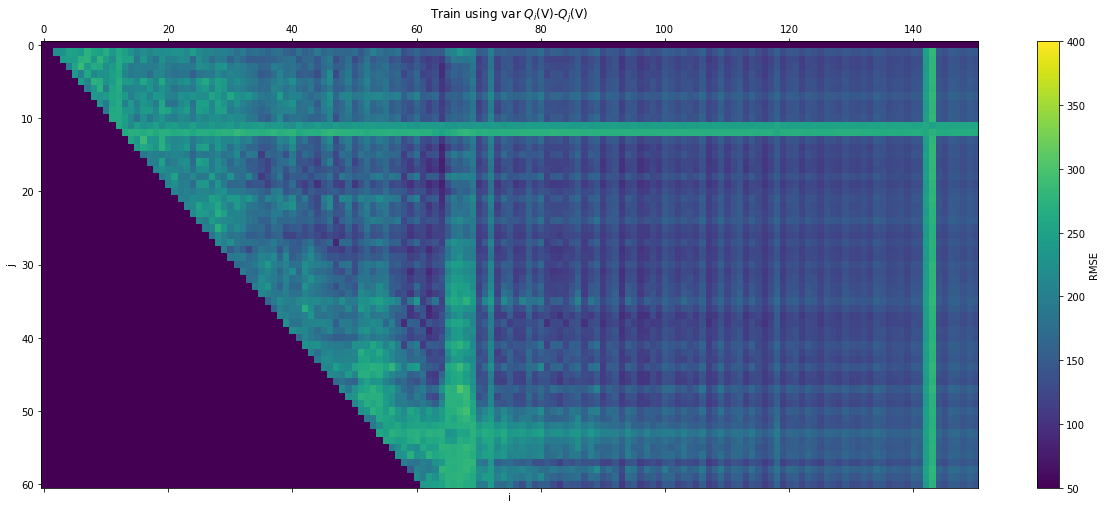

In [91]:
plt.figure(figsize=(21,8))
plt.matshow(mx_train, cmap=plt.cm.viridis,fignum=1,aspect='auto')
plt.clim(50,400)
plt.colorbar(label='RMSE')
plt.xlabel('i')
plt.ylabel('j')
plt.title('Train using var $Q_i$(V)-$Q_j$(V)')
plt.show()

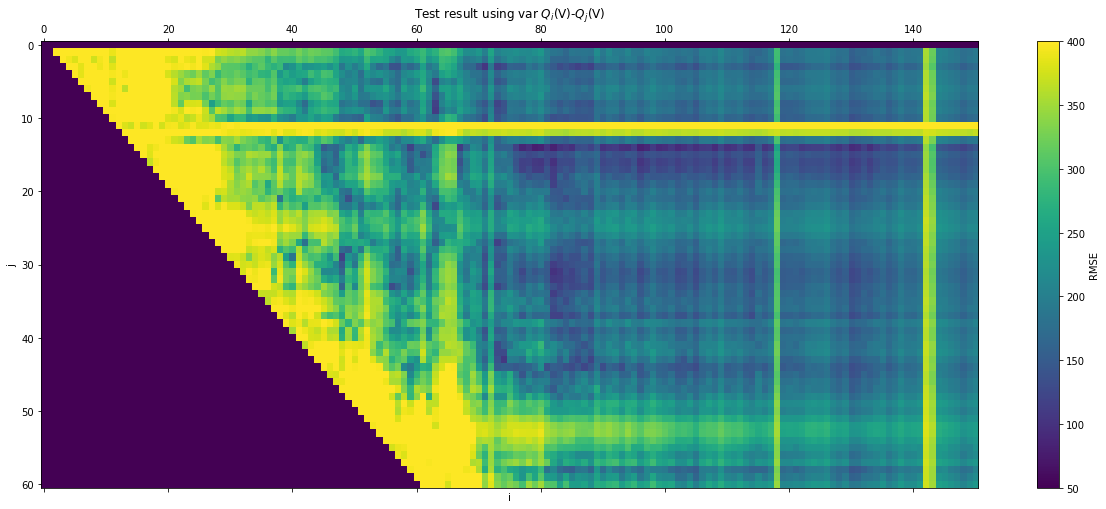

In [92]:
plt.figure(figsize=(21,8))
plt.matshow(mx_test, cmap=plt.cm.viridis,fignum=1,aspect='auto')
plt.clim(50,400)
plt.colorbar(label='RMSE')
plt.xlabel('i')
plt.ylabel('j')
plt.title('Test result using var $Q_i$(V)-$Q_j$(V)')
plt.show()